In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import importlib

import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.datasets import load_breast_cancer

import charts as charts
import evaluations as evals

# Ignore warnings as they make notebook difficult to read (they are mostly useless)
import warnings

warnings.filterwarnings("ignore")

In [2]:
SEED = 42
np.random.seed(SEED)
CV = 5
F1_SCORE = 'f1'
BREAST_CANCER = f'{os.getcwd()}/figures/breast-cancer'
STEP_1_PATH = f"{BREAST_CANCER}/step-1"
STEP_2_PATH = f"{BREAST_CANCER}/step-2"
STEP_3_PATH = f"{BREAST_CANCER}/step-3"
STEP_4_PATH = f"{BREAST_CANCER}/step-4"
STEP_5_PATH = f"{BREAST_CANCER}/step-5"

charts.setup_plots()

In [3]:
dataset = load_breast_cancer(as_frame=True)
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [4]:
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Combine the normalized data
X_normalized = pd.concat((X_train_normalized, X_test_normalized), axis=0)


In [5]:
X_train = X_train_normalized
X_test = X_test_normalized

In [6]:
importlib.reload(charts)
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(X_train, f"{BREAST_CANCER}/pair_plot.png")

<module 'charts' from '/Users/pavponn/gatech/machine-learning/assignment-3/charts.py'>

# Step 1 (Clustering algorithms)

## K-Means

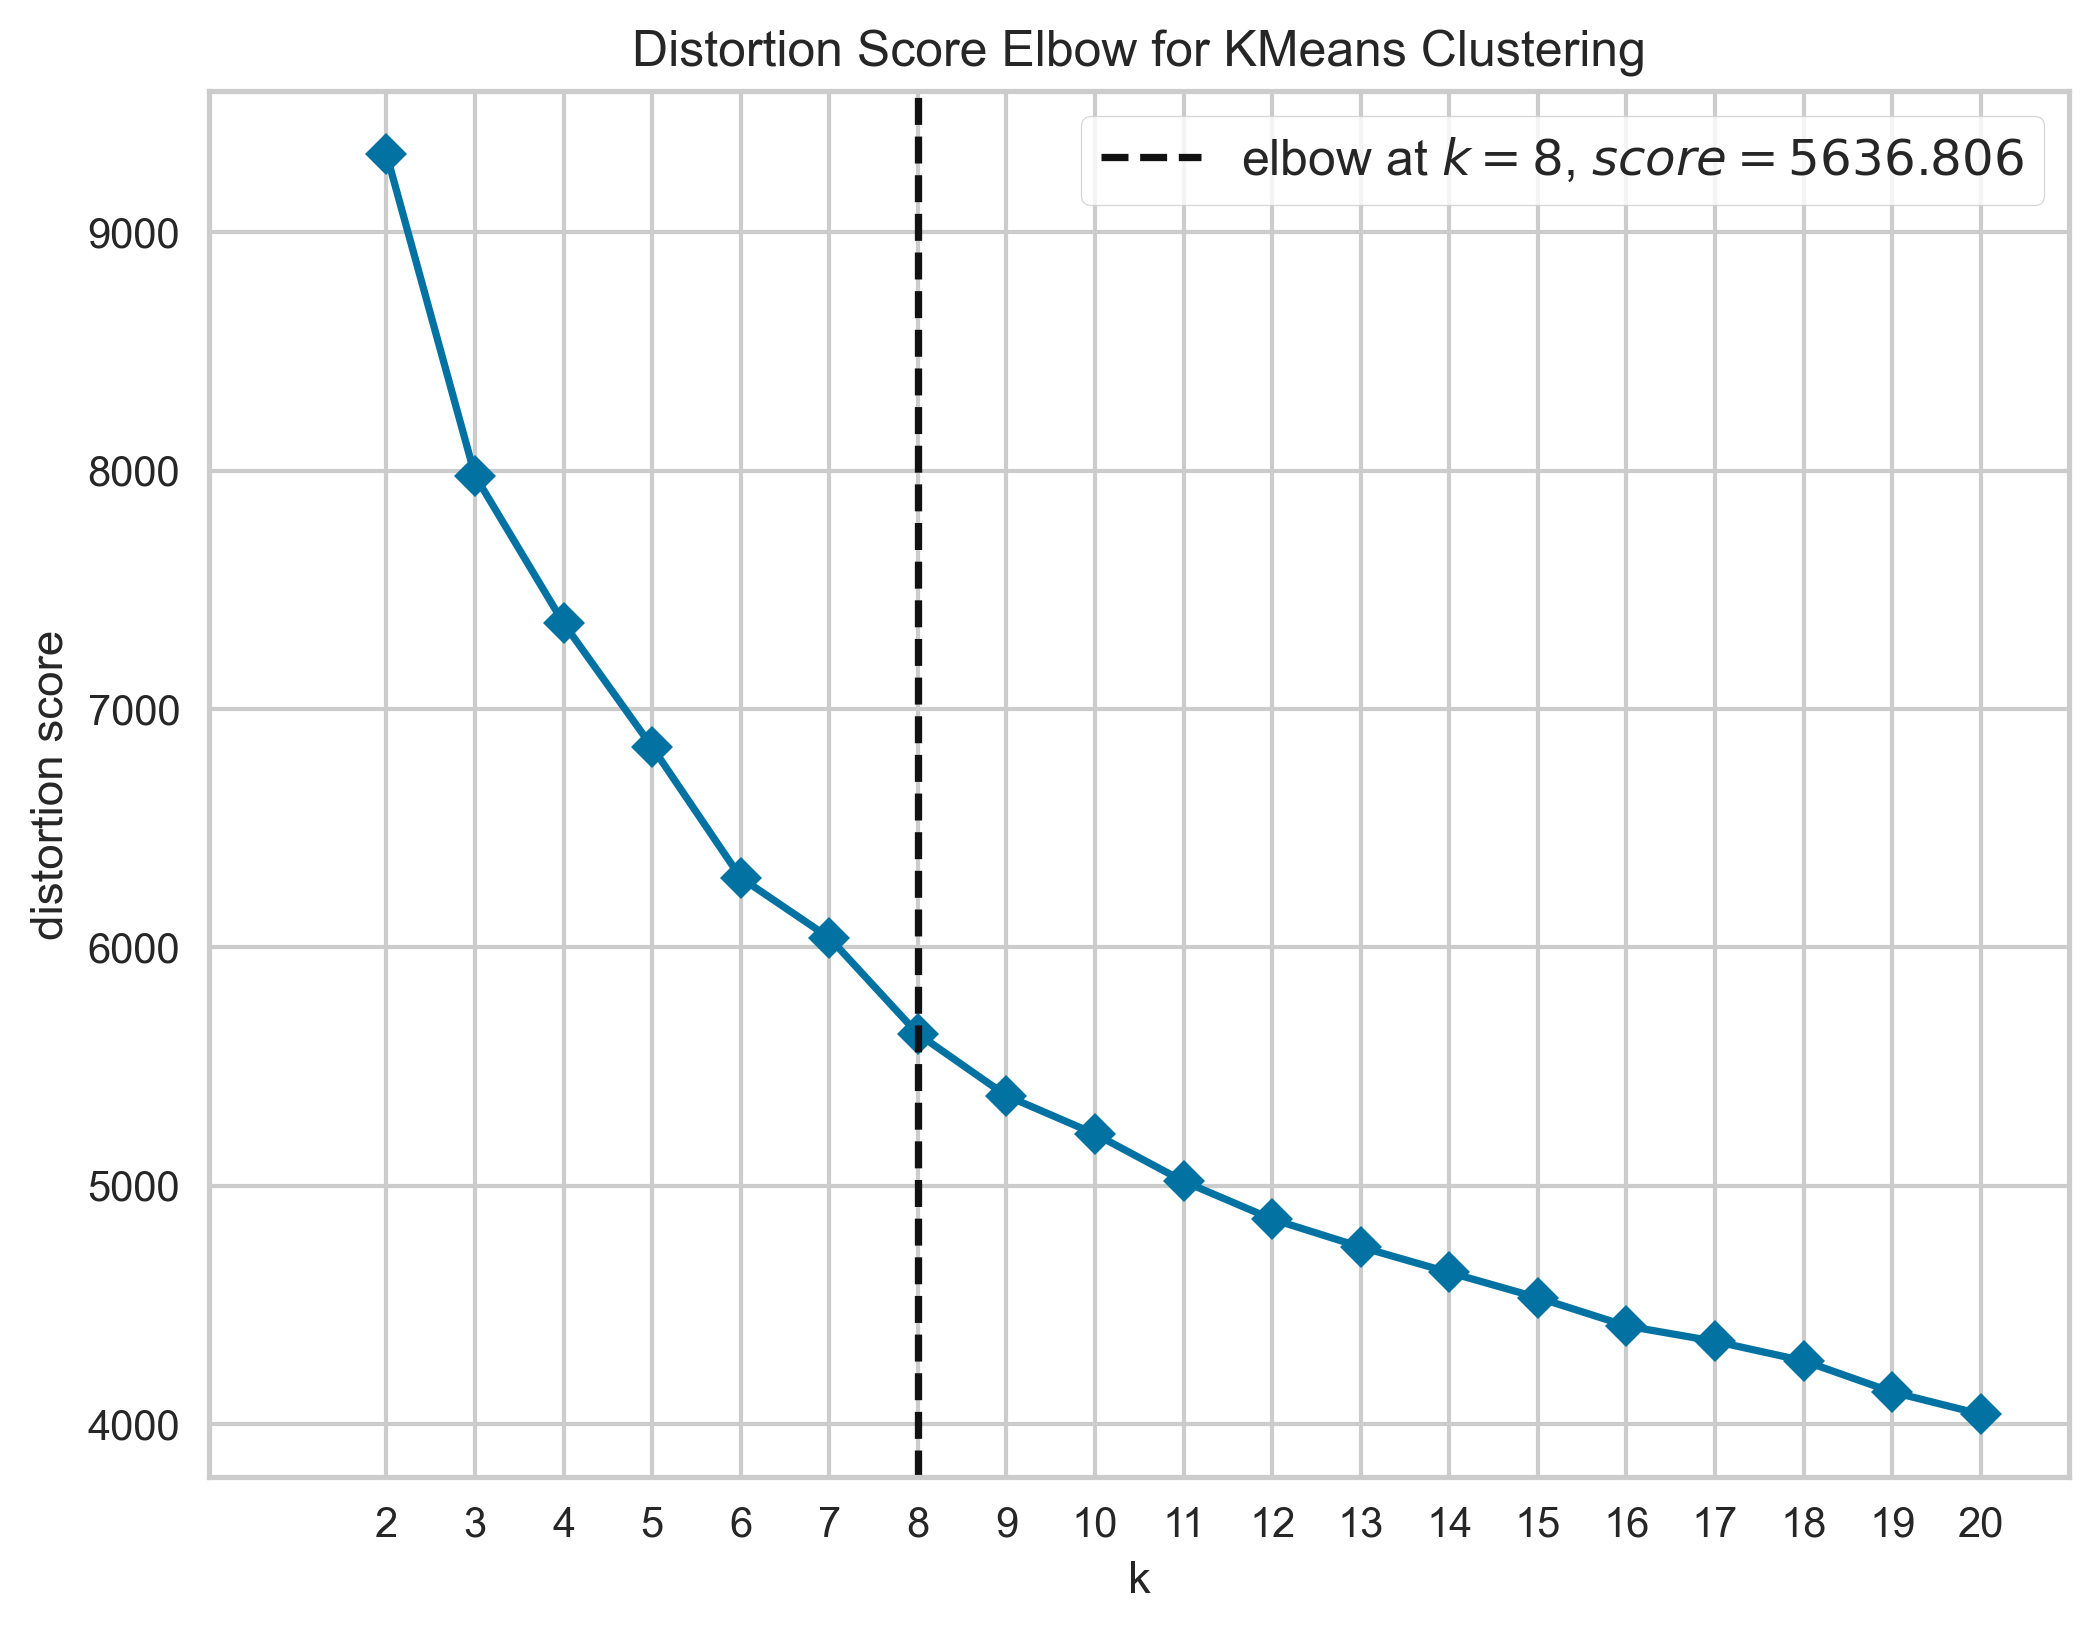

In [7]:
importlib.reload(charts)
# Using distortion/inertia
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_distortion.png",
                         seed=SEED,
                         metric='distortion',
                         locate_elbow=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


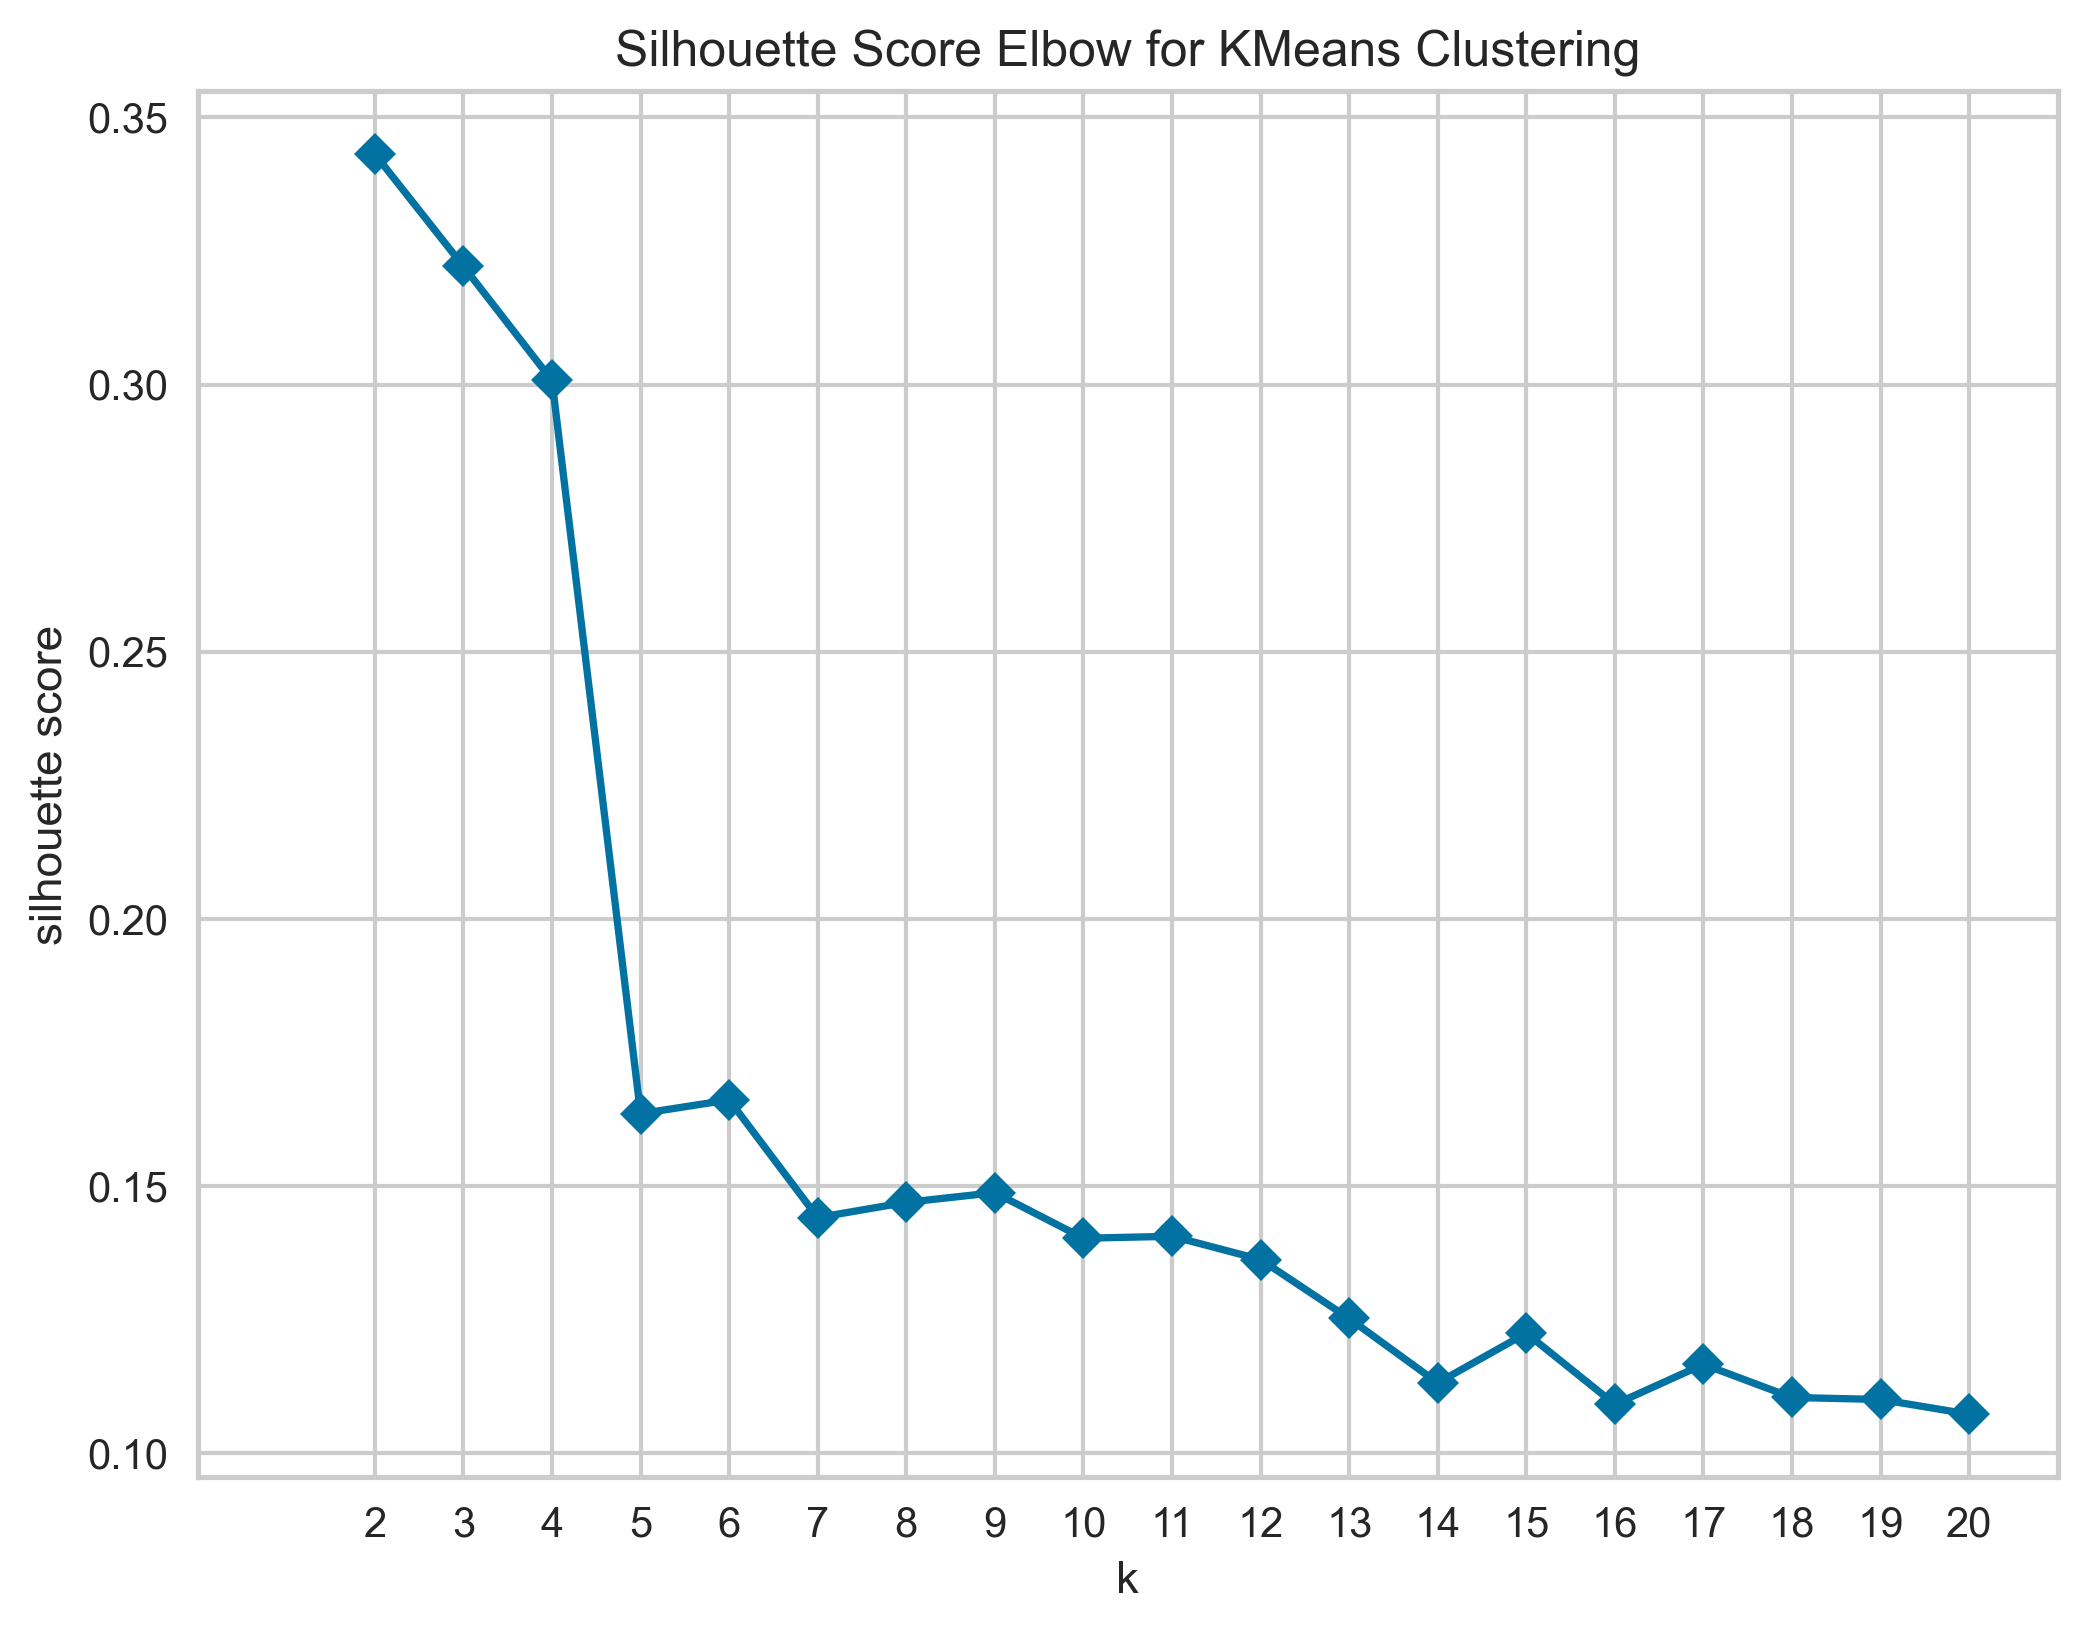

In [8]:
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_silhouette.png",
                         seed=SEED,
                         metric='silhouette',
                         locate_elbow=False)

## Expectation Maximization

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


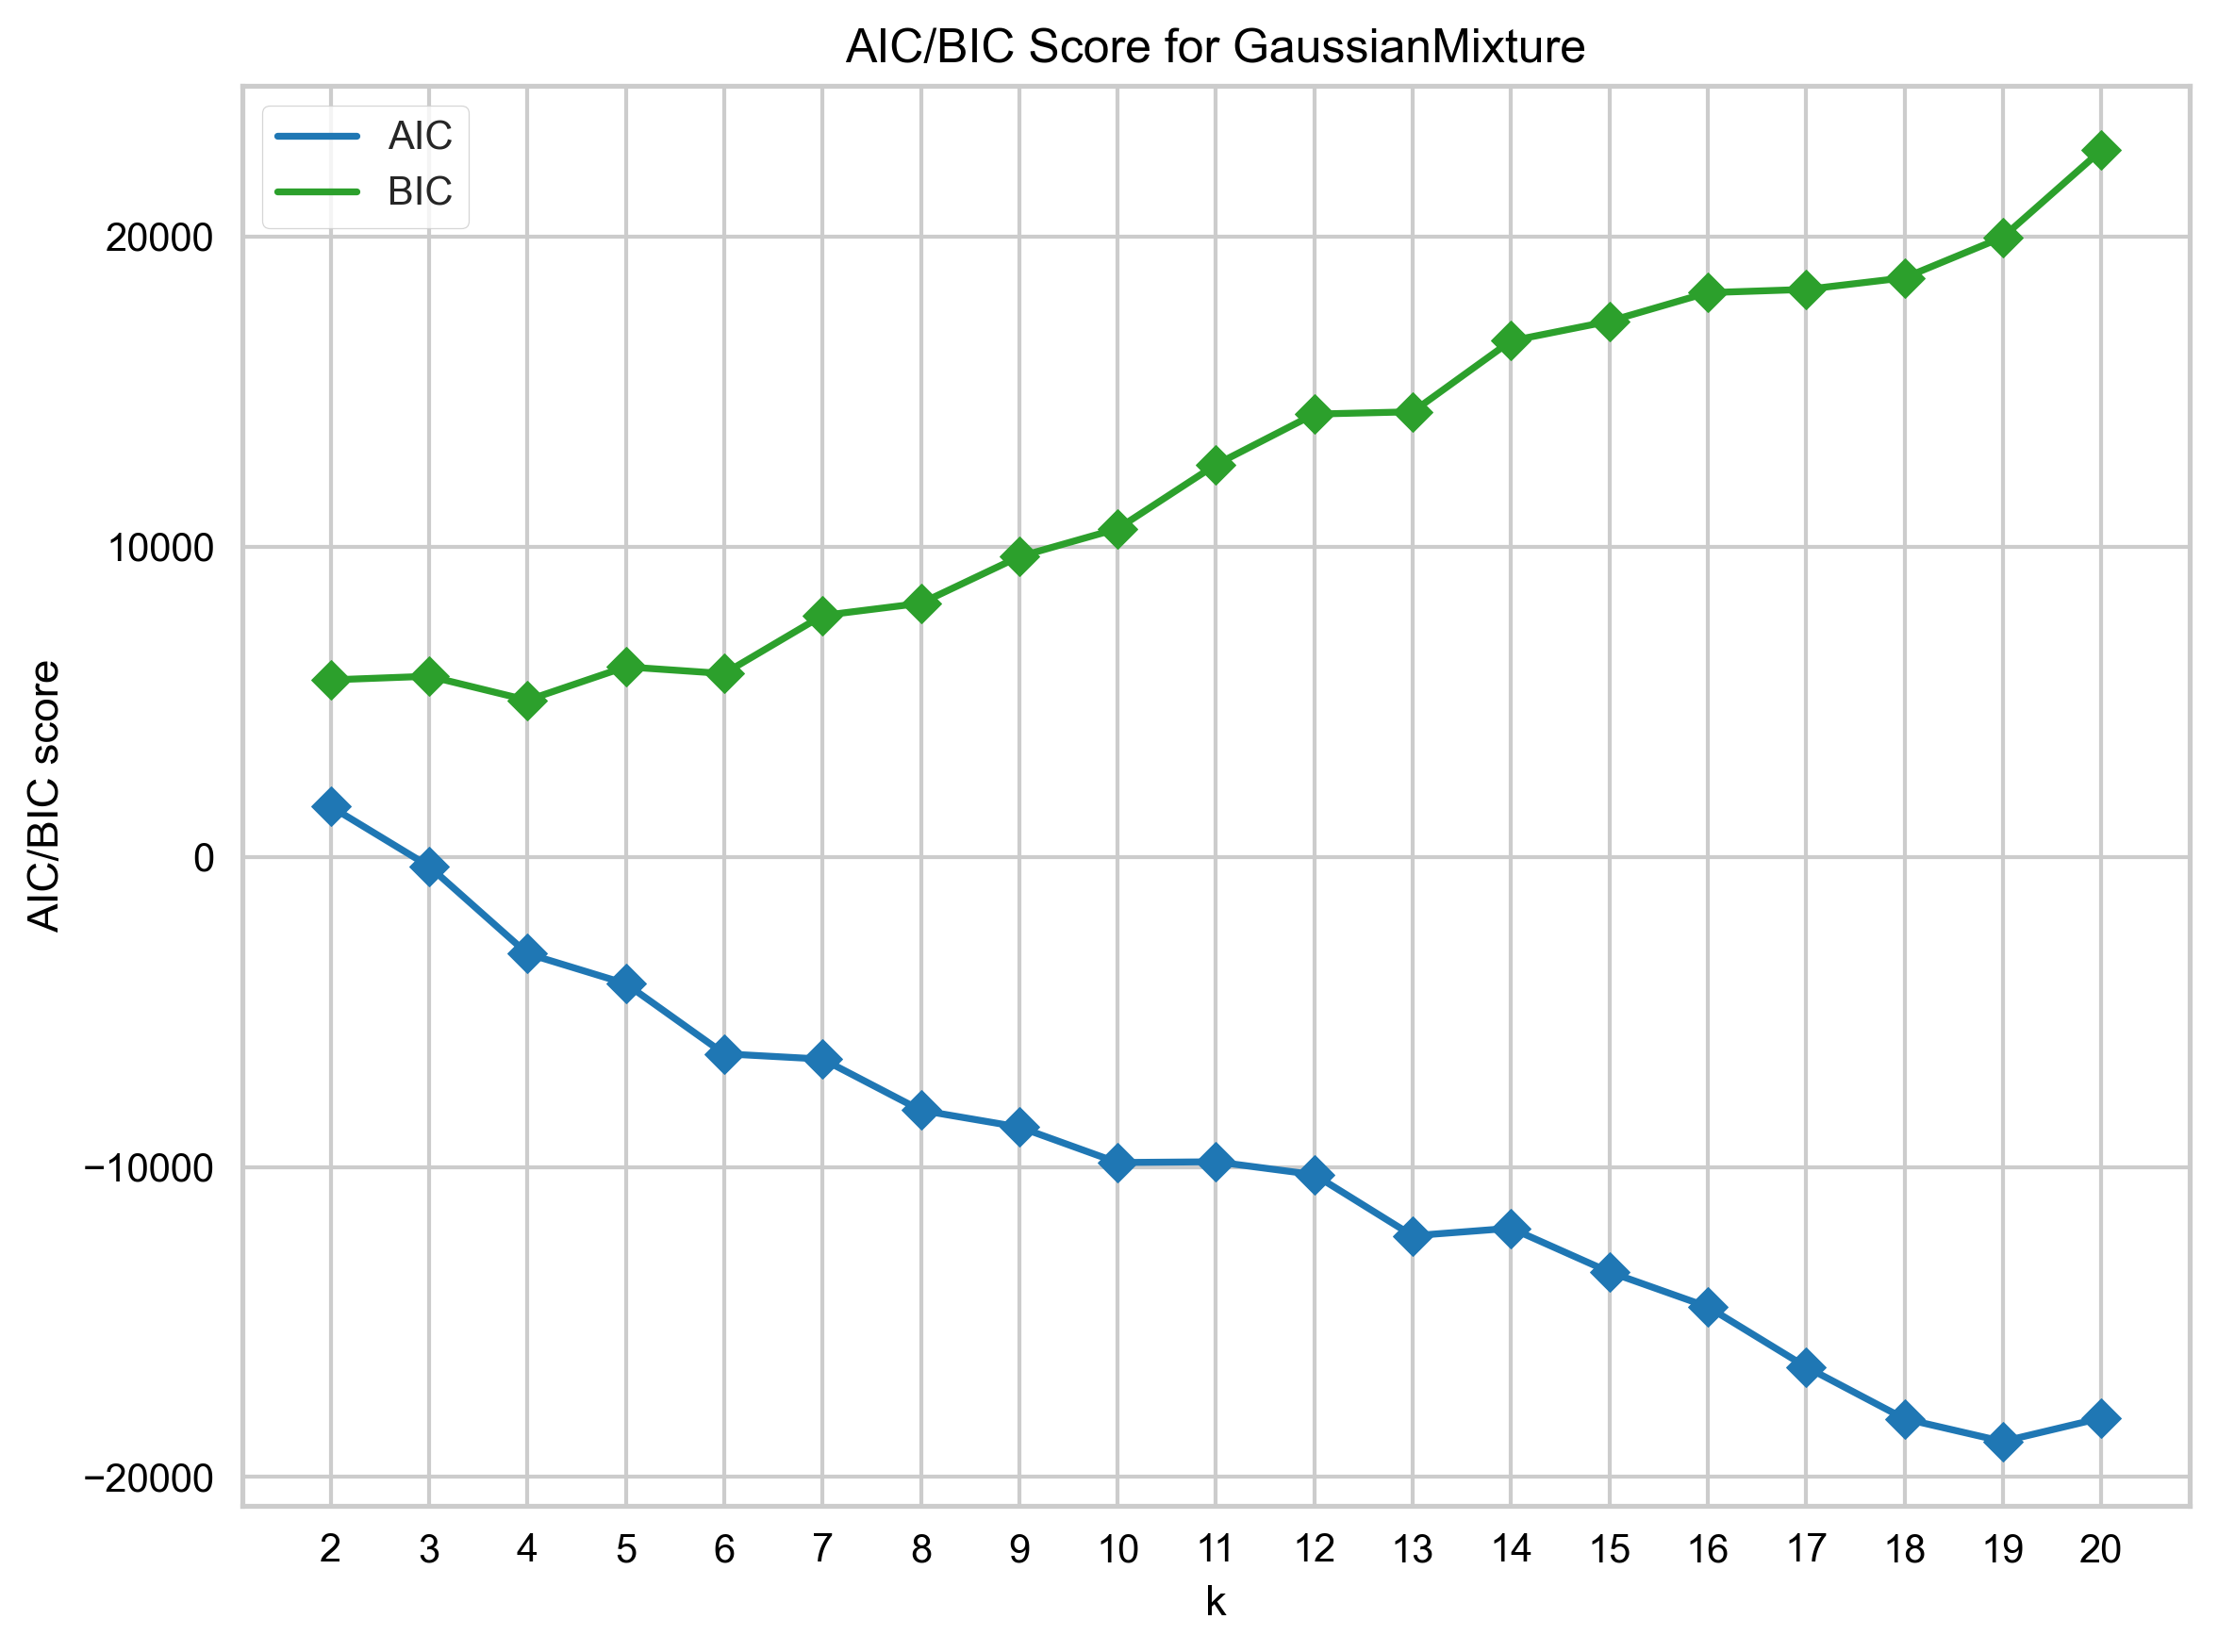

In [9]:
importlib.reload(charts)
charts.gmm_visualize_aic_bic(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_aic_bic.png",
    seed=SEED,
    k_max=20,
    n_init=10,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


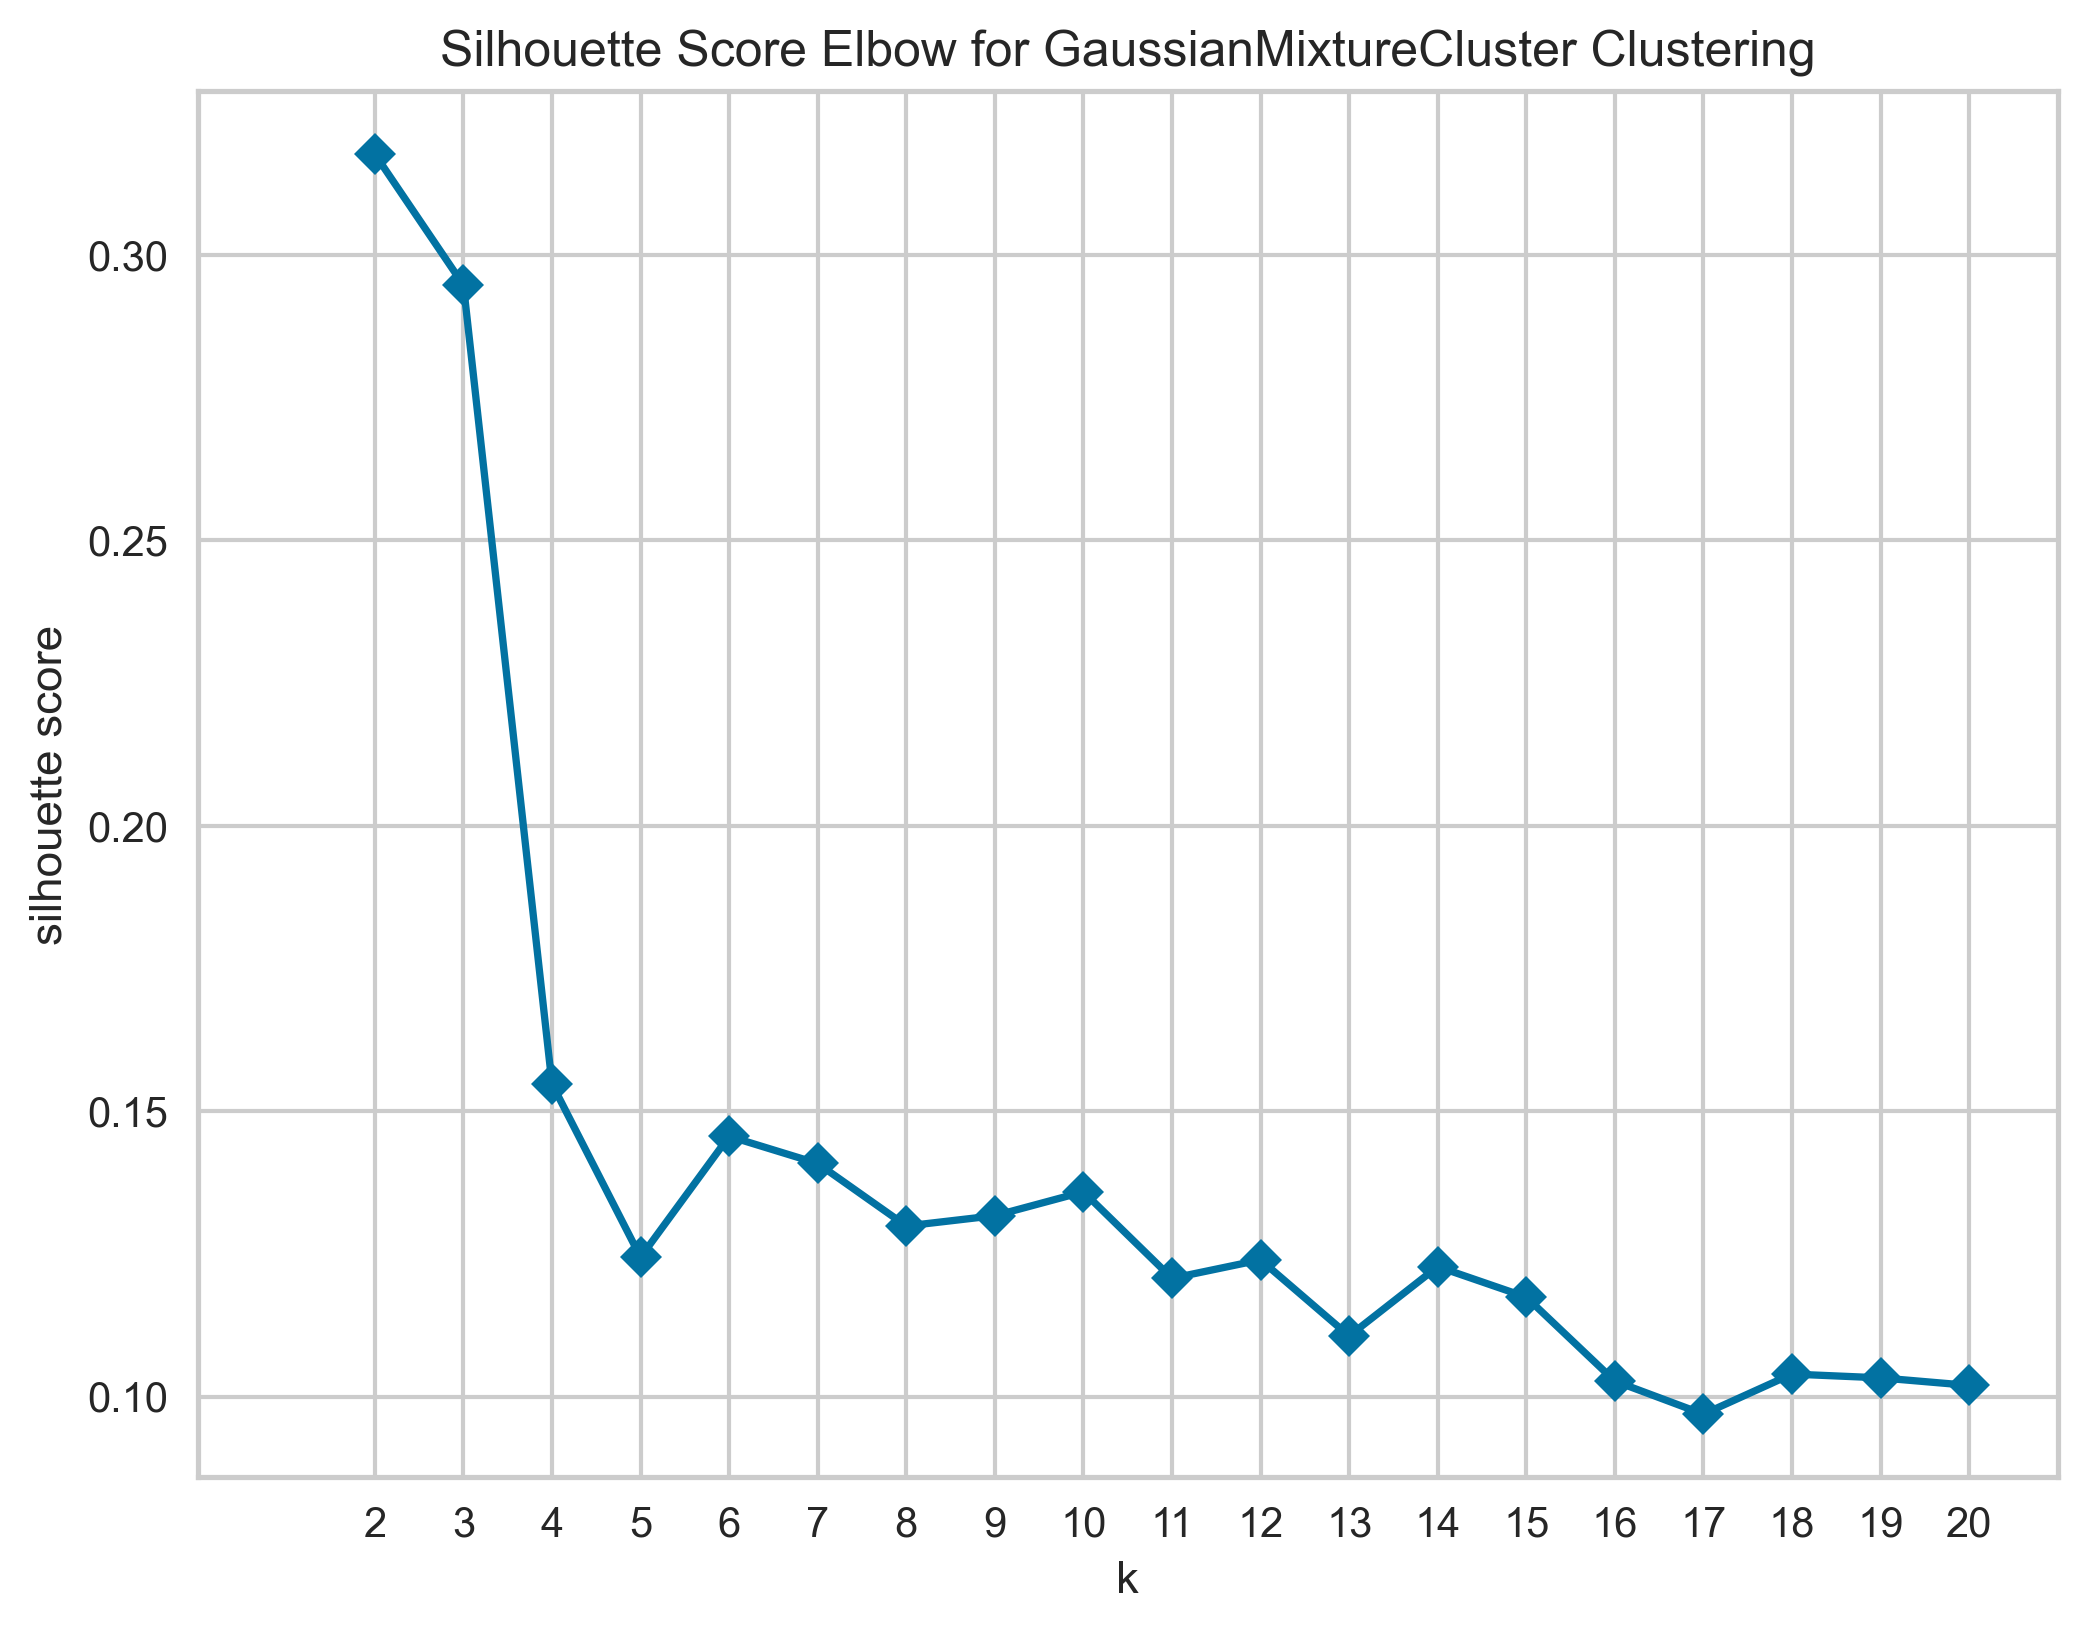

In [10]:
importlib.reload(charts)
charts.gmm_visualize(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_silhouette.png",
    metric='silhouette',
    seed=SEED,
    k_max=20,
    n_init=10,
    locate_elbow=False,
)

## Evaluation

In [11]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

importlib.reload(evals)

#  evaluation
evals.evaluate_models(
    models=[
        ('KMeans (k=8)', KMeans(random_state=SEED, n_clusters=8)),
        ('KMeans (k=2)', KMeans(random_state=SEED, n_clusters=2)),
        ('GMM (k=4)', GaussianMixture(random_state=SEED, n_components=4, n_init=10)),
        ('GMM (k=2)', GaussianMixture(random_state=SEED, n_components=2, n_init=10)),
    ],
    X_data=X_train,
    labels=y_train
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
KMeans (k=8) 0    0.606061   0.369802            0.454612   
KMeans (k=2) 0    0.821368   0.516719            0.337273   
GMM (k=4)    0    0.697255   0.390991            0.358556   
GMM (k=2)    0    0.865169   0.610962            0.404090   

                Fowlkes-Mallows index  
KMeans (k=8) 0               0.514962  
KMeans (k=2) 0               0.834313  
GMM (k=4)    0               0.669846  
GMM (k=2)    0               0.872896

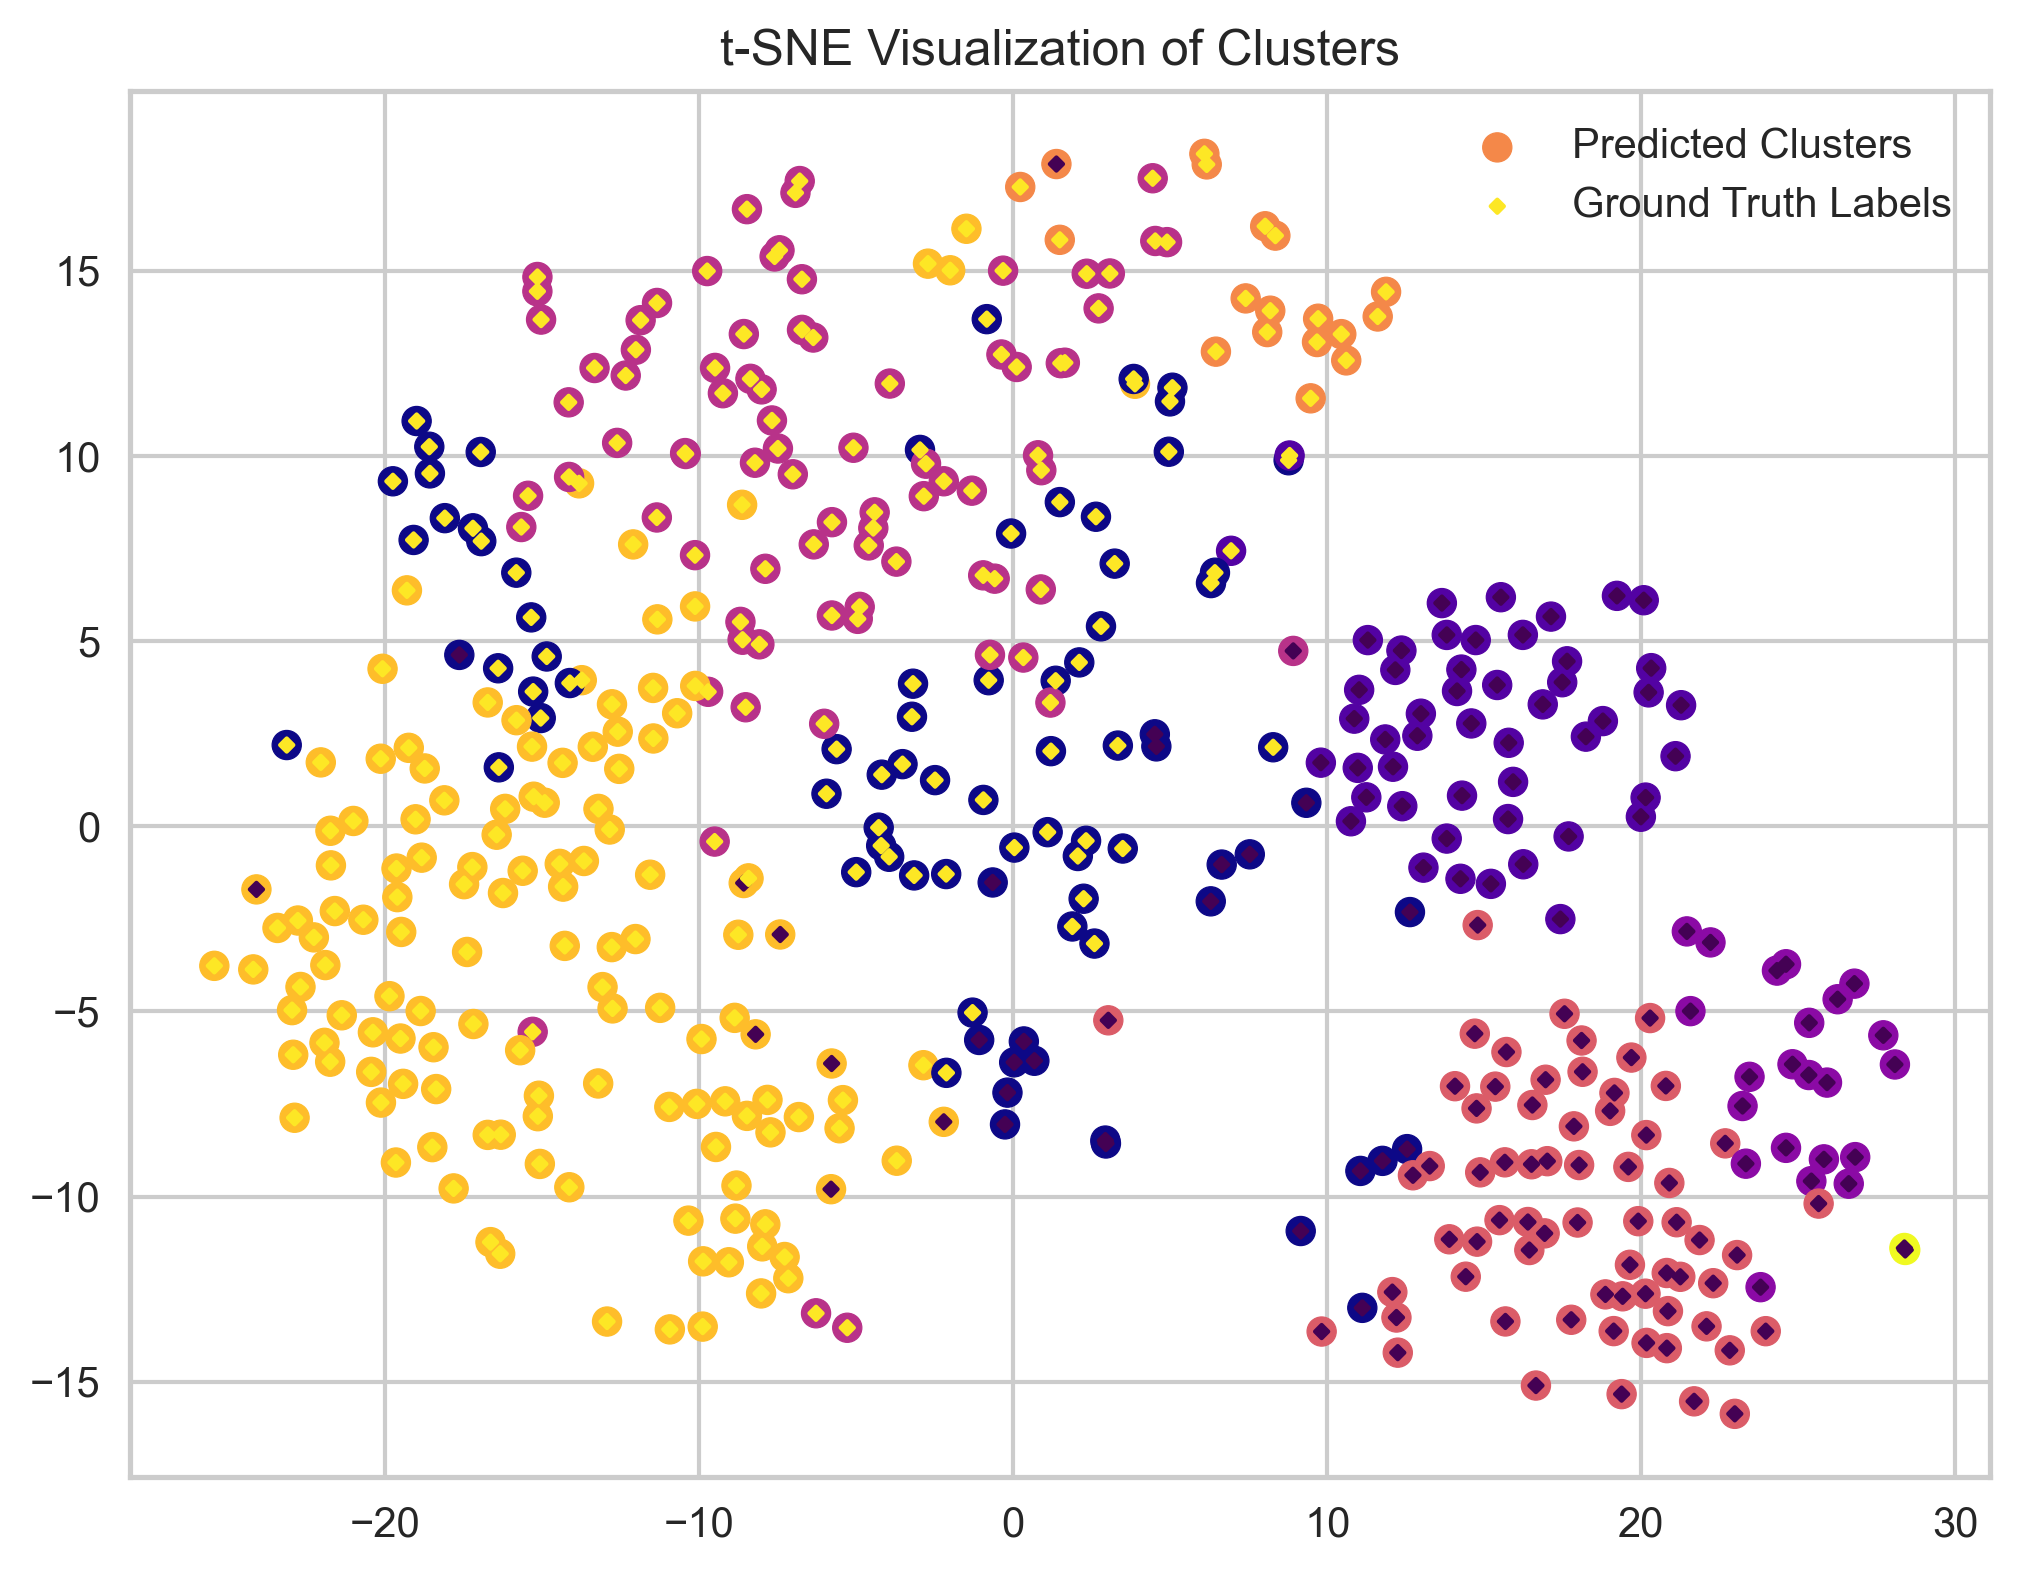

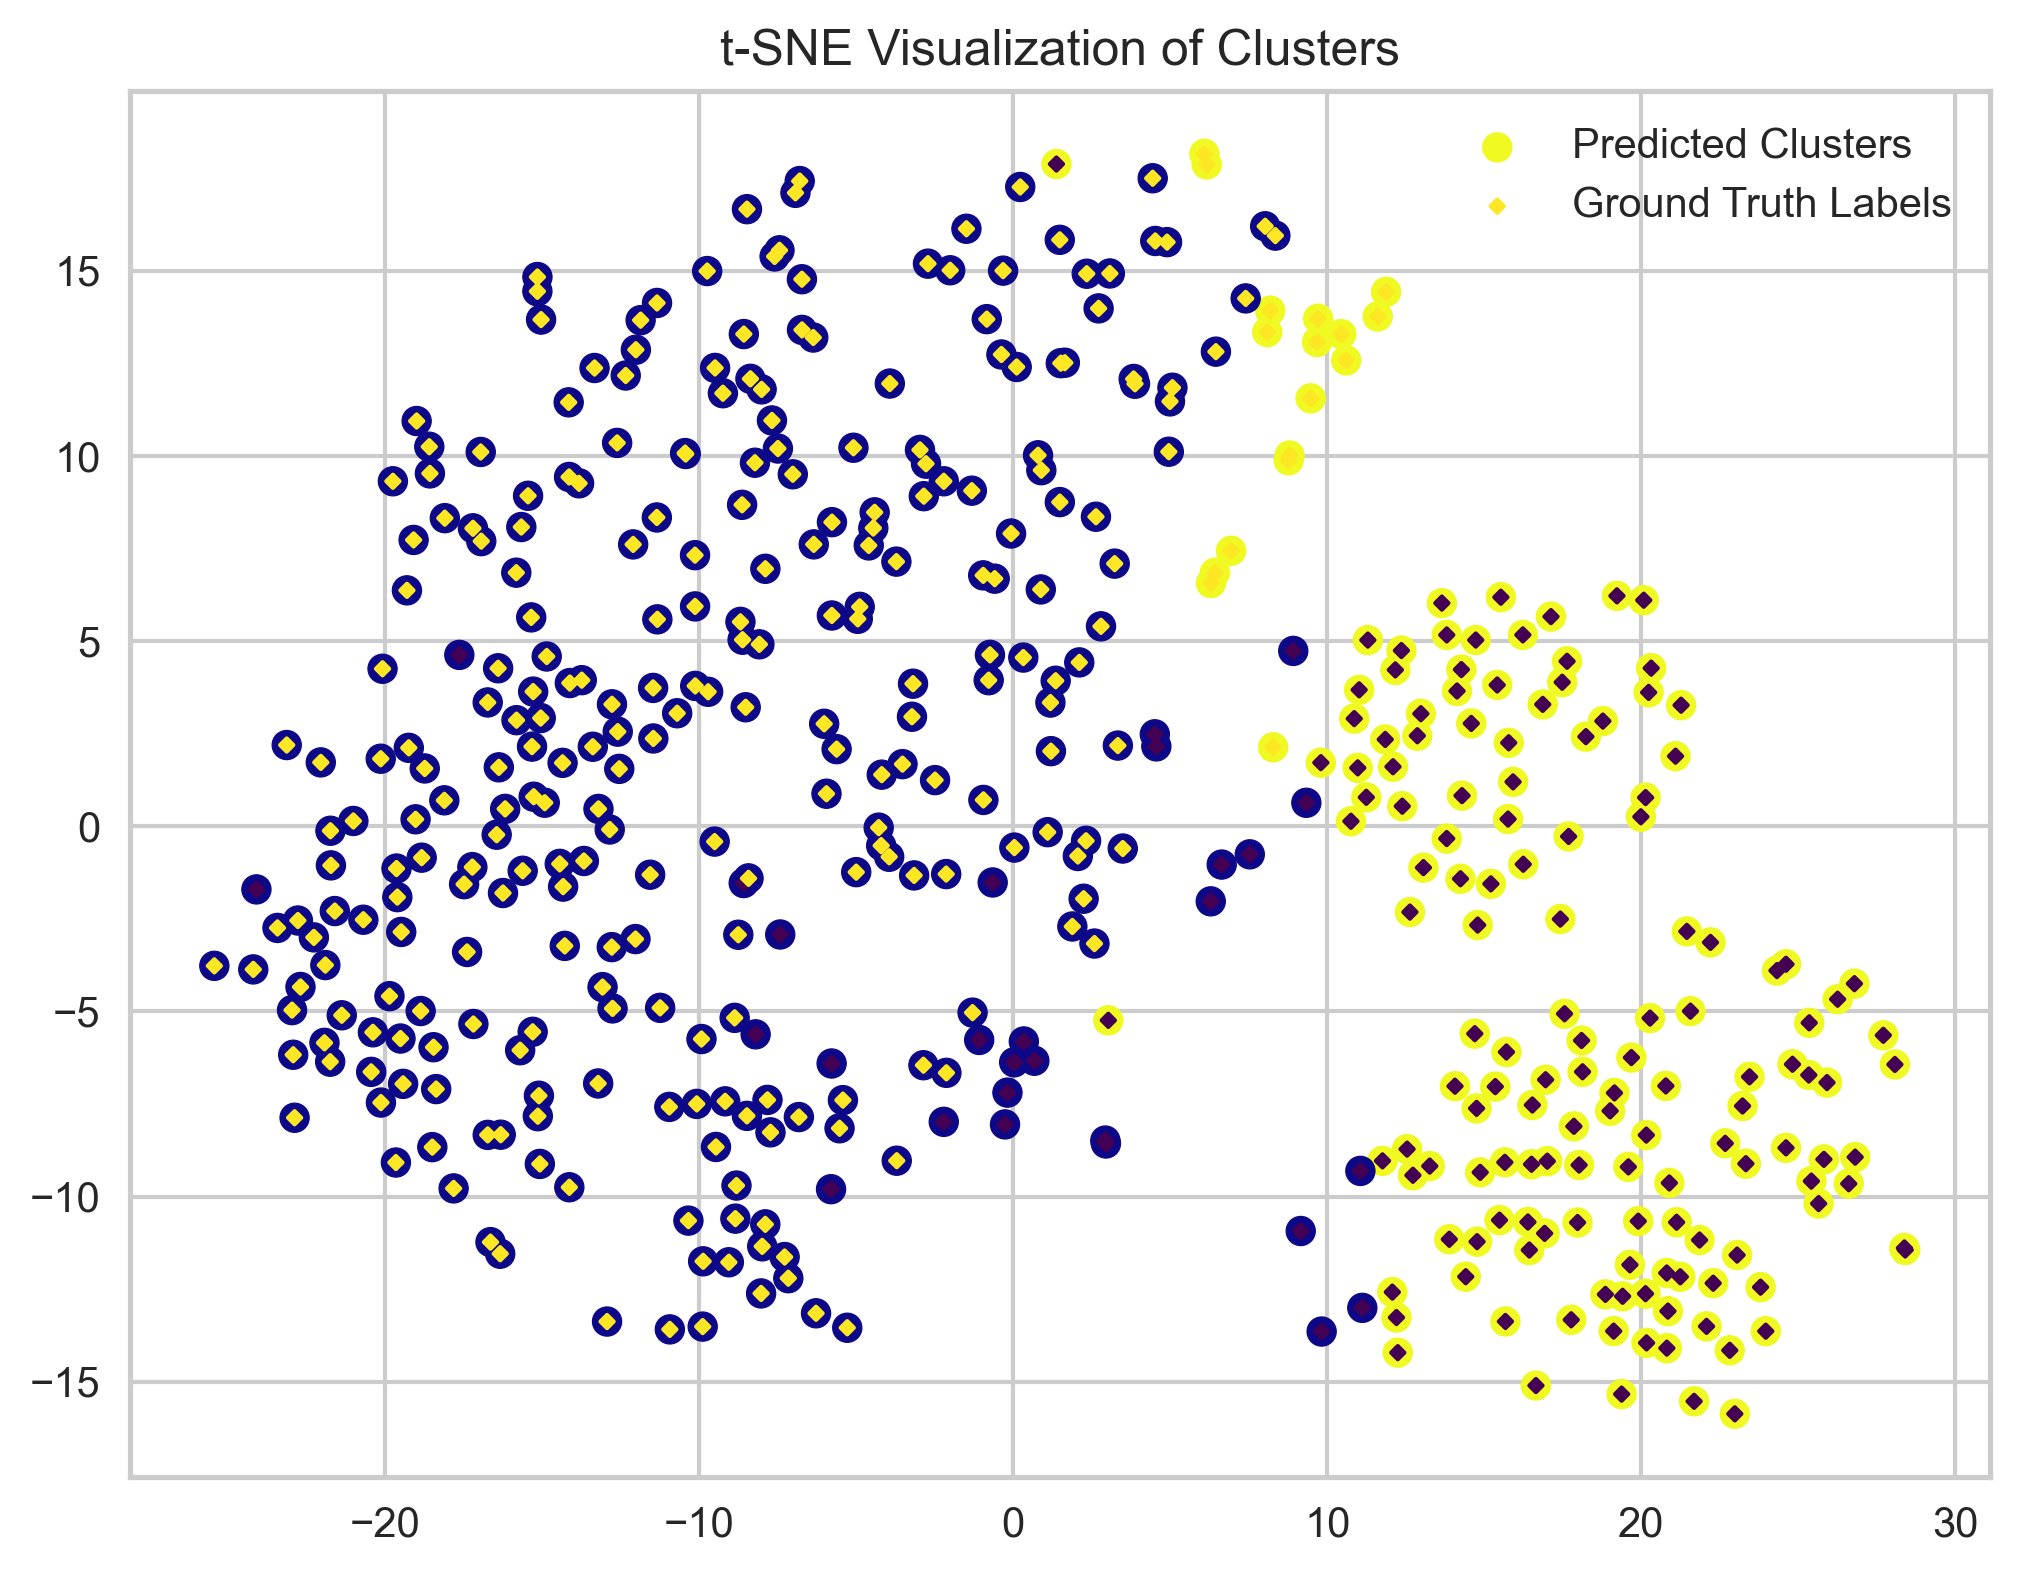

In [12]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=KMeans(random_state=SEED, n_clusters=8),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/k_means_clusters_visualization_k_8.png",
    seed=SEED,
)
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=KMeans(random_state=SEED, n_clusters=2),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/k_means_clusters_visualization_k_2.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


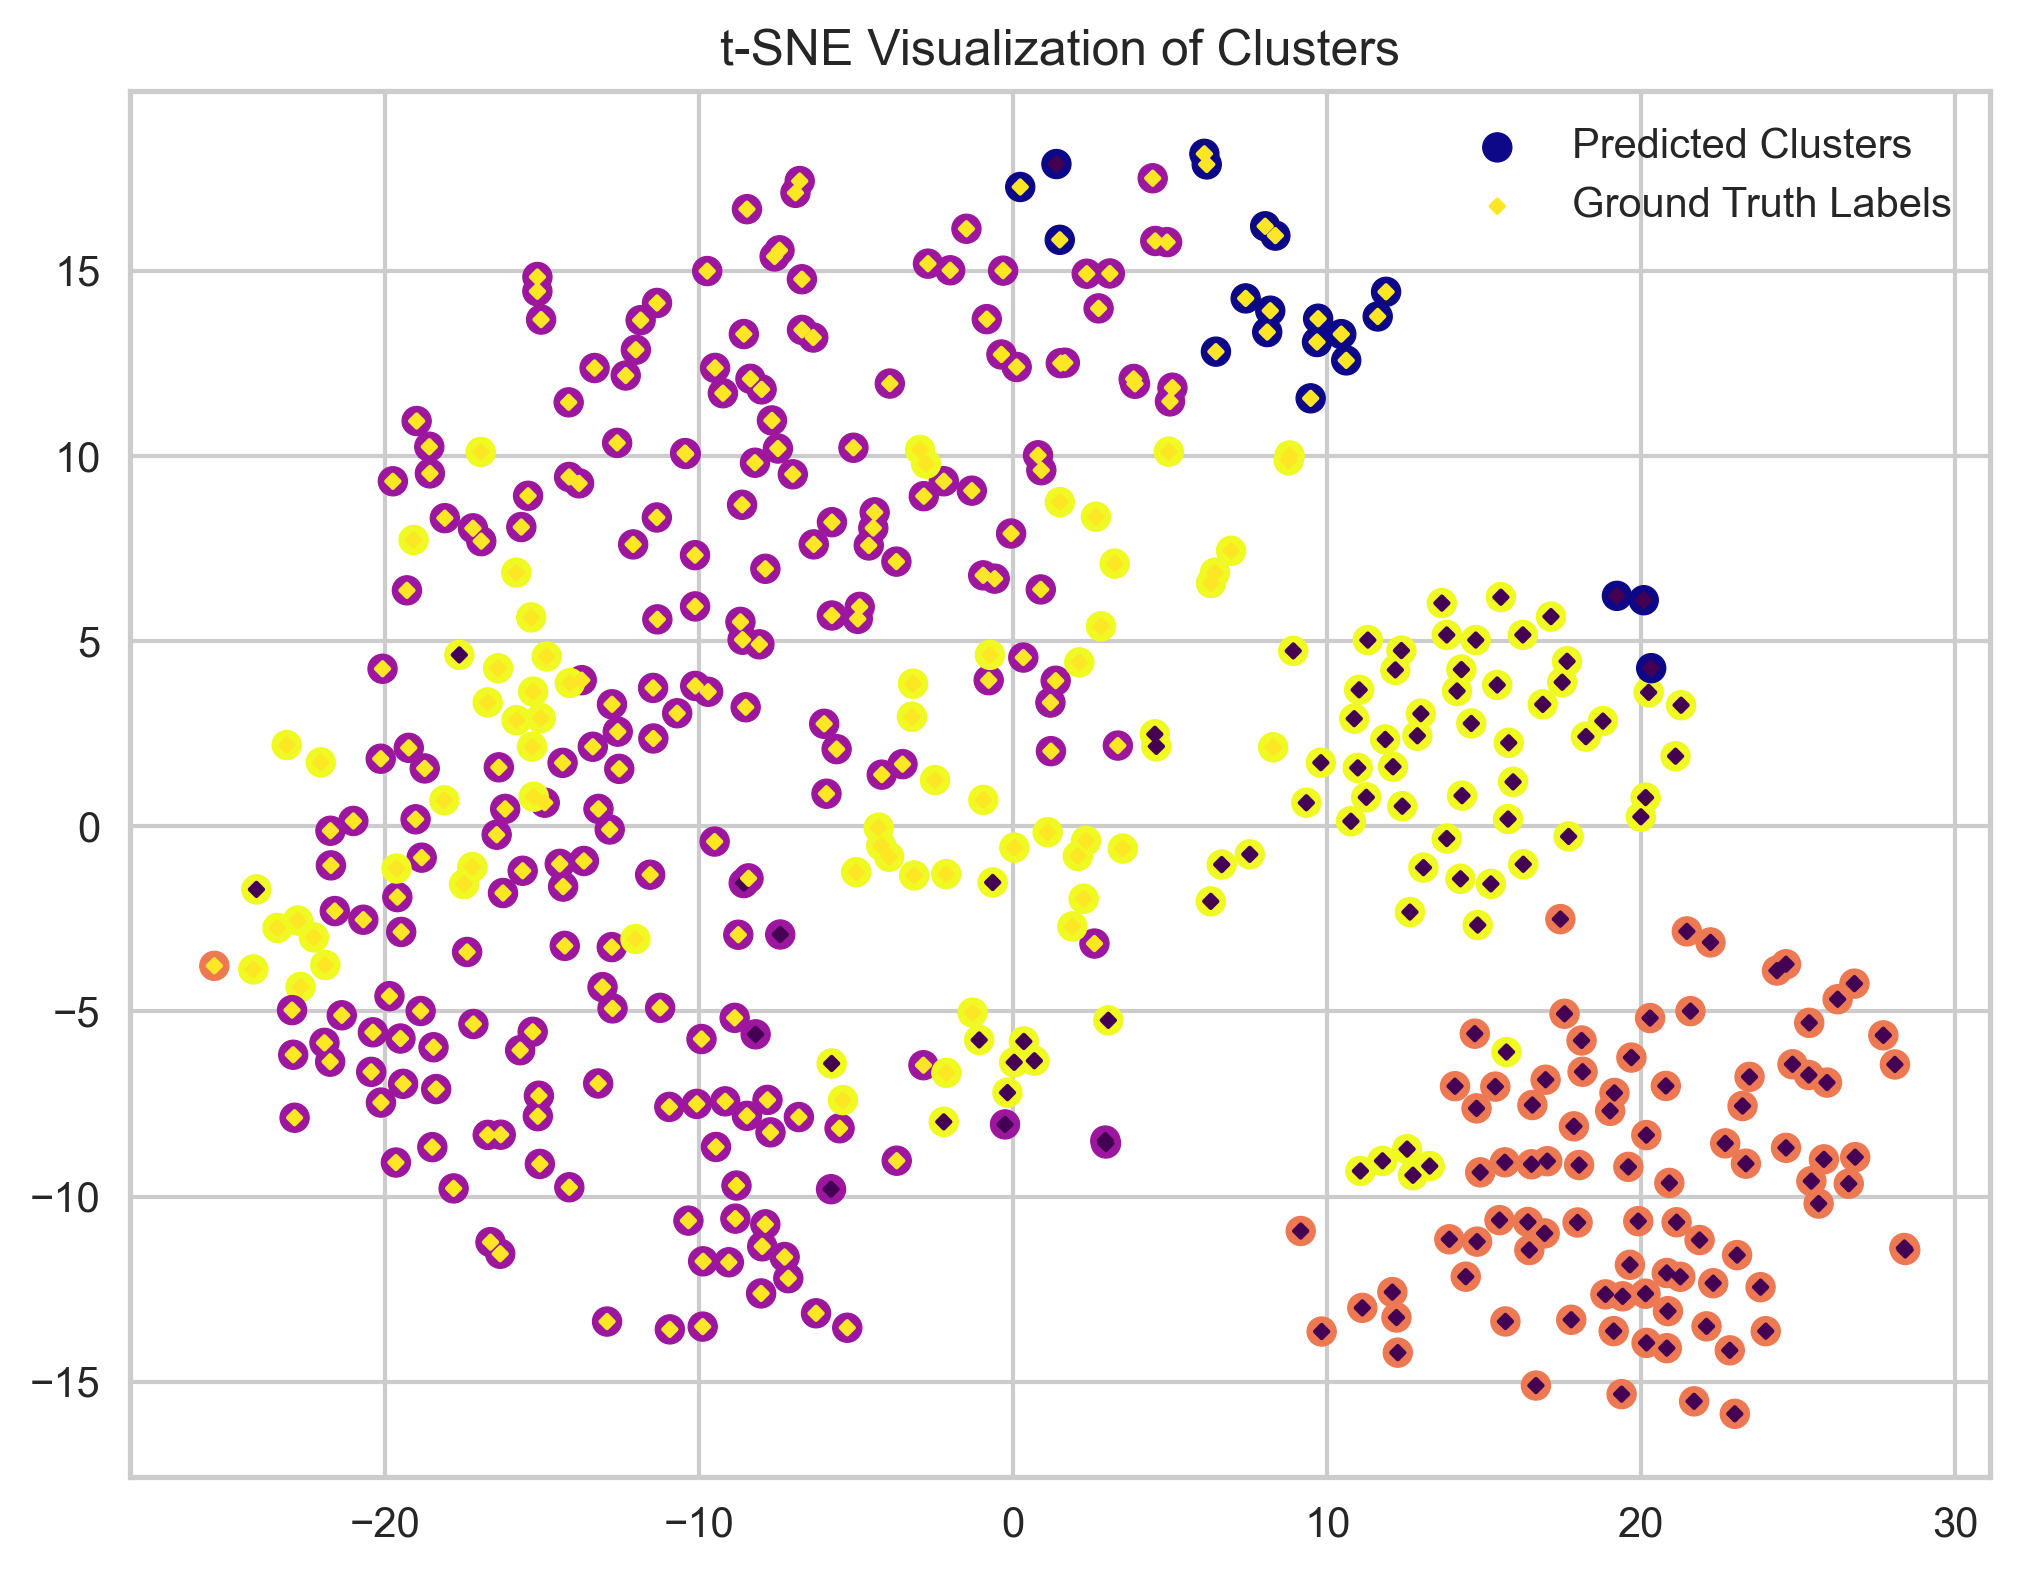

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [13]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=GaussianMixture(random_state=SEED, n_components=4, n_init=10),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/em_clusters_visualization_k_4.png",
    seed=SEED,
)

charts.visualize_clusters_with_tsne(
    model=GaussianMixture(random_state=SEED, n_components=2, n_init=10),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/em_clusters_visualization_k_2.png",
    seed=SEED,
)

# Step 2

## PCA

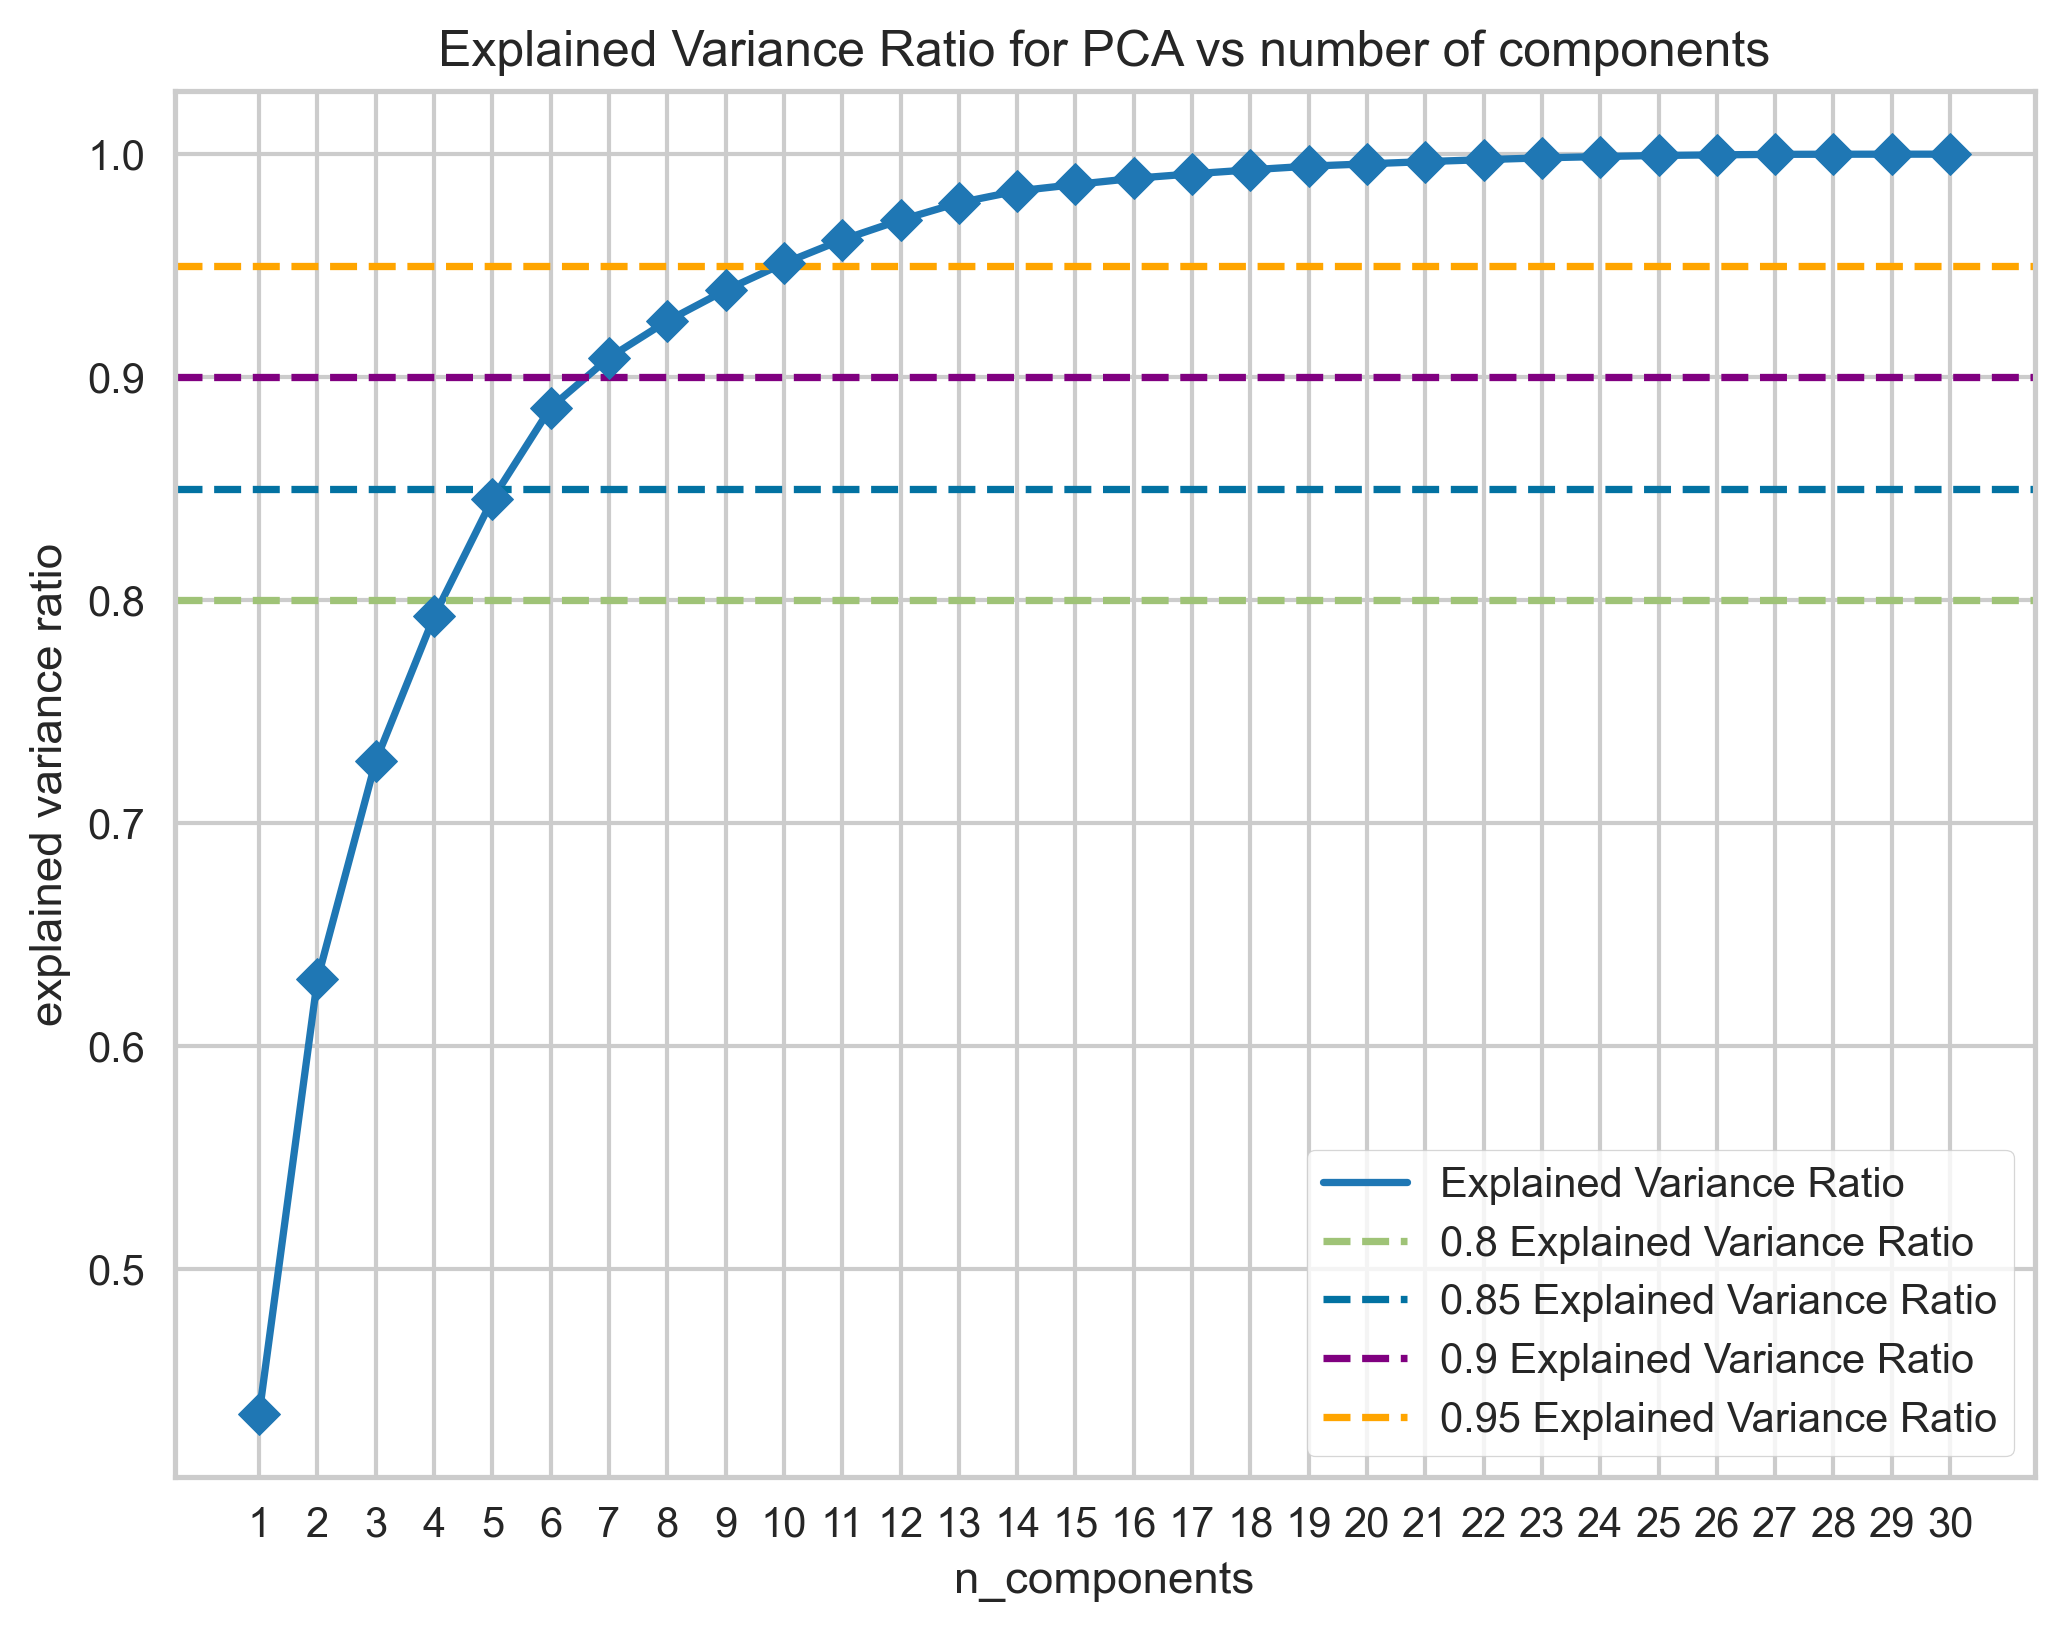

In [14]:
importlib.reload(charts)
charts.pca_visualize_explained_variance_ratio(X_train, f"{STEP_2_PATH}/pca_explained_variance_ratio.png")

Eigen values: [1.30795808e+01 5.86288753e+00 2.94091922e+00 1.95020901e+00
 1.57948467e+00 1.23655760e+00 6.72154363e-01 4.95474613e-01
 4.14927499e-01 3.62375076e-01 3.17667767e-01 2.65630196e-01
 2.32225690e-01 1.59858052e-01 8.72024257e-02 8.26408171e-02
 6.07697261e-02 5.45134242e-02 4.92191229e-02 3.12451064e-02
 3.00216975e-02 2.64231415e-02 2.43480901e-02 1.73381143e-02
 1.49216721e-02 8.30696920e-03 6.78932006e-03 1.52633753e-03
 7.39282339e-04 1.21955095e-04]


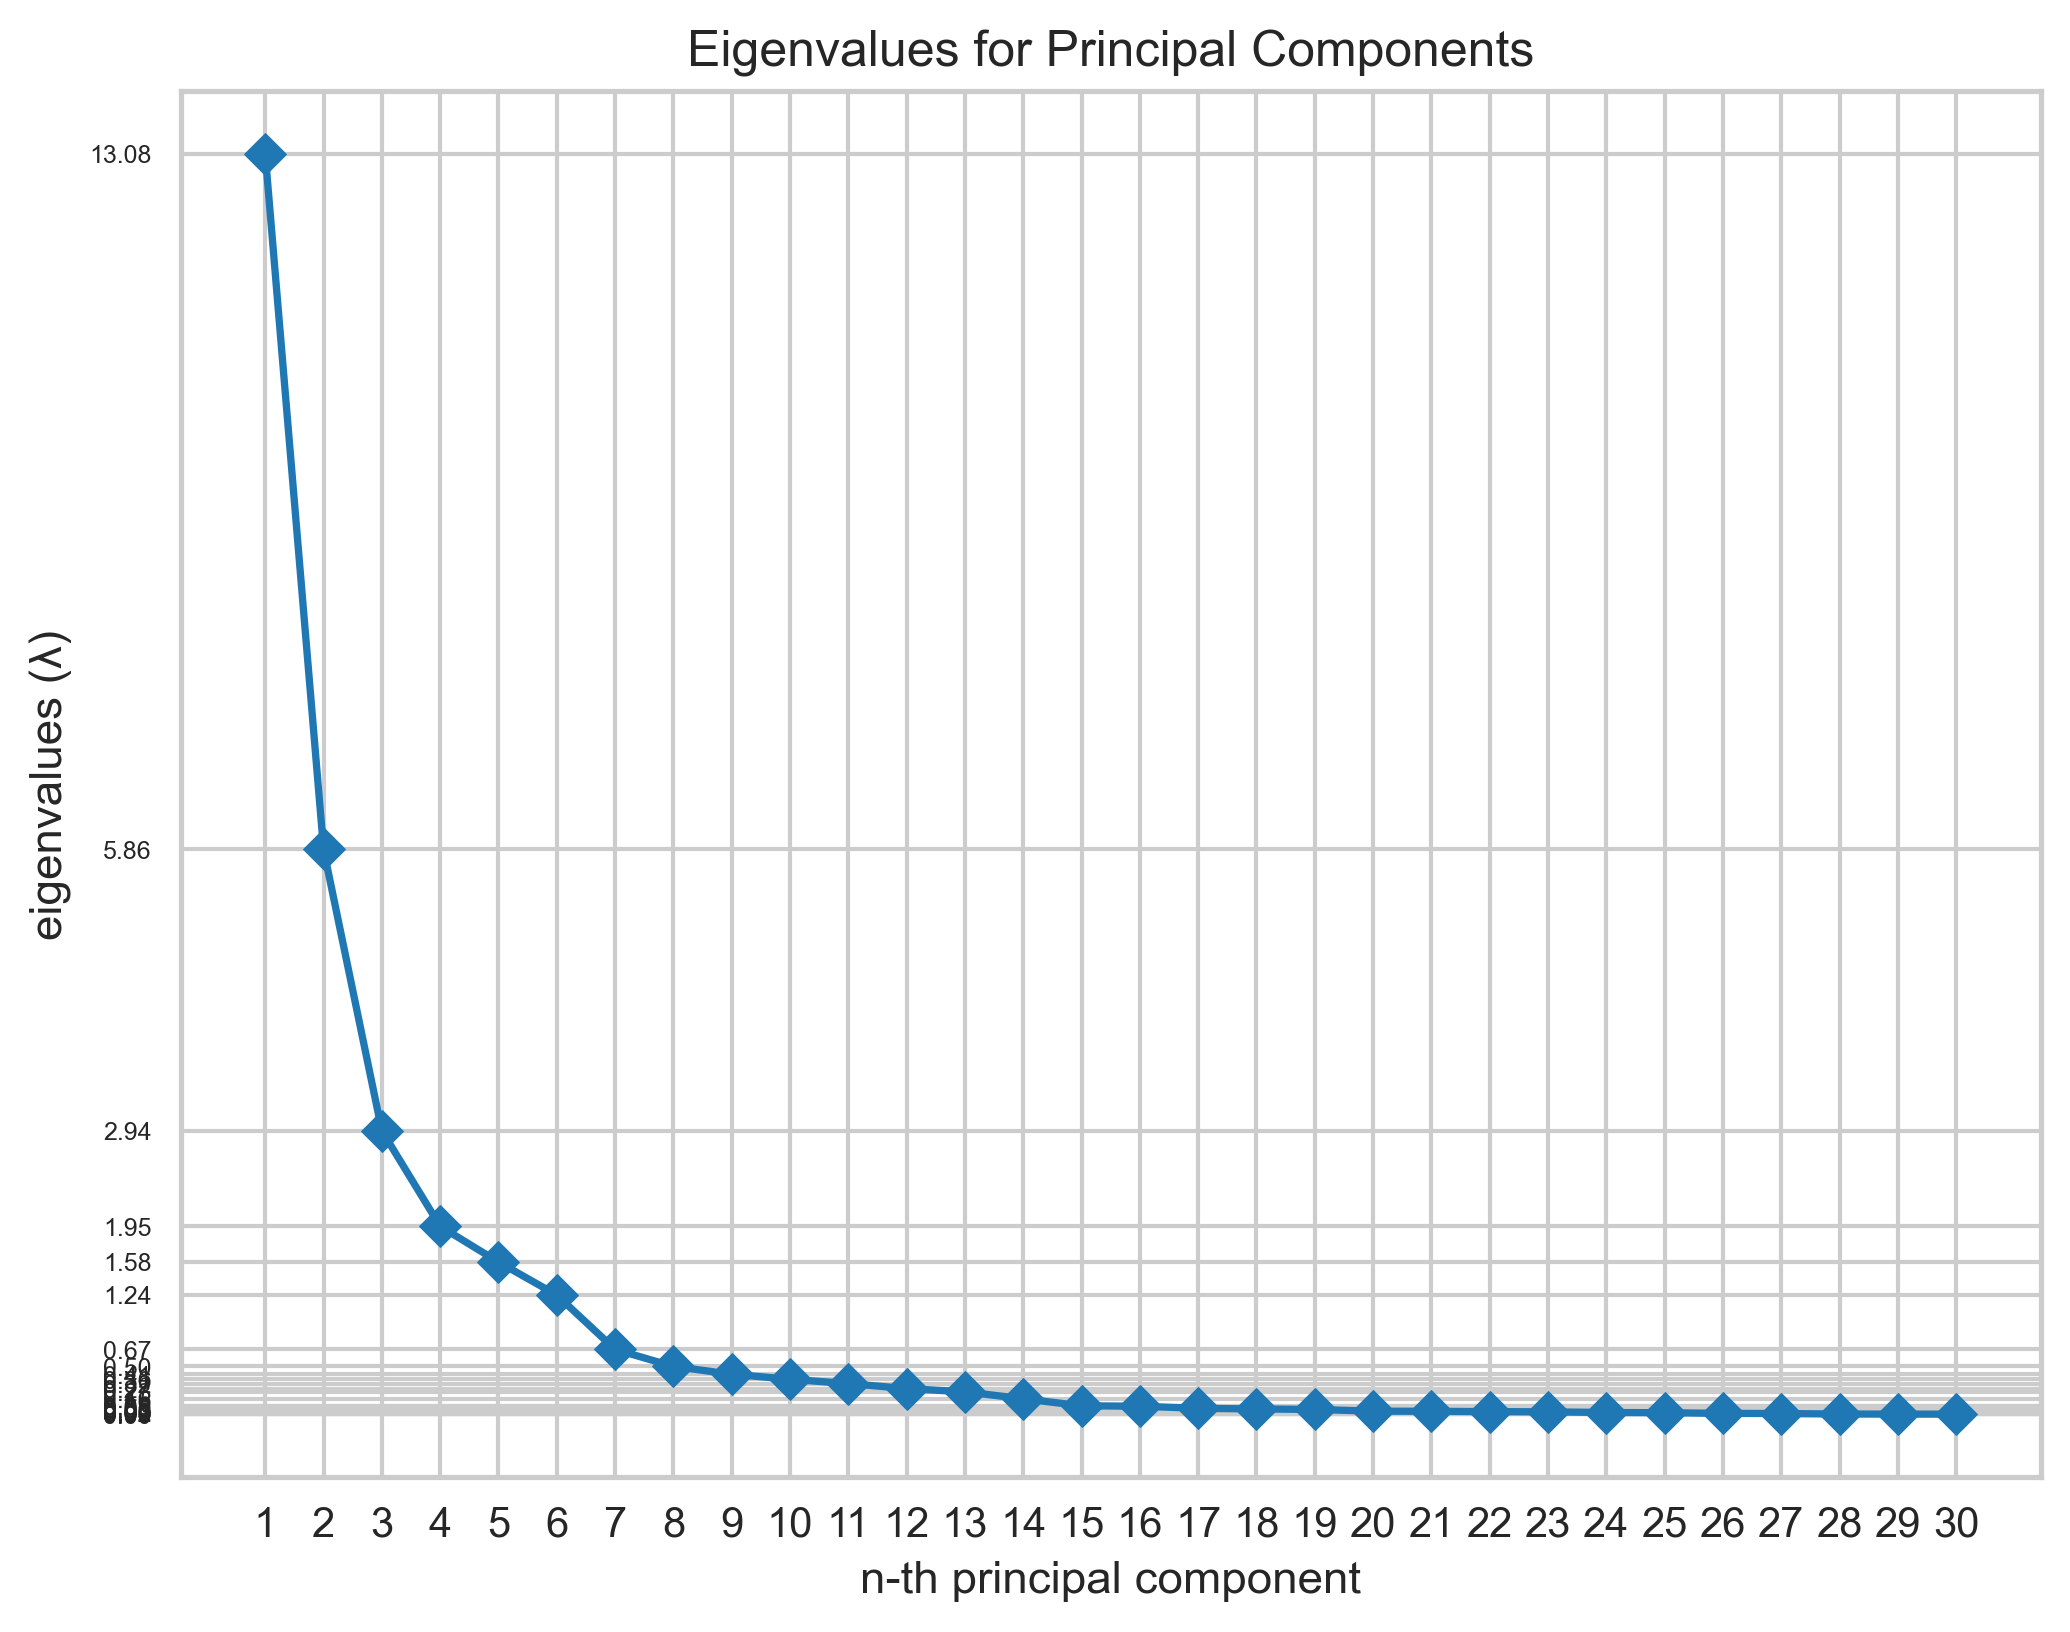

In [15]:
importlib.reload(charts)
charts.pca_visualize_eigenvalues(X_train, f"{STEP_2_PATH}/pca_eigenvalues.png")

## ICA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


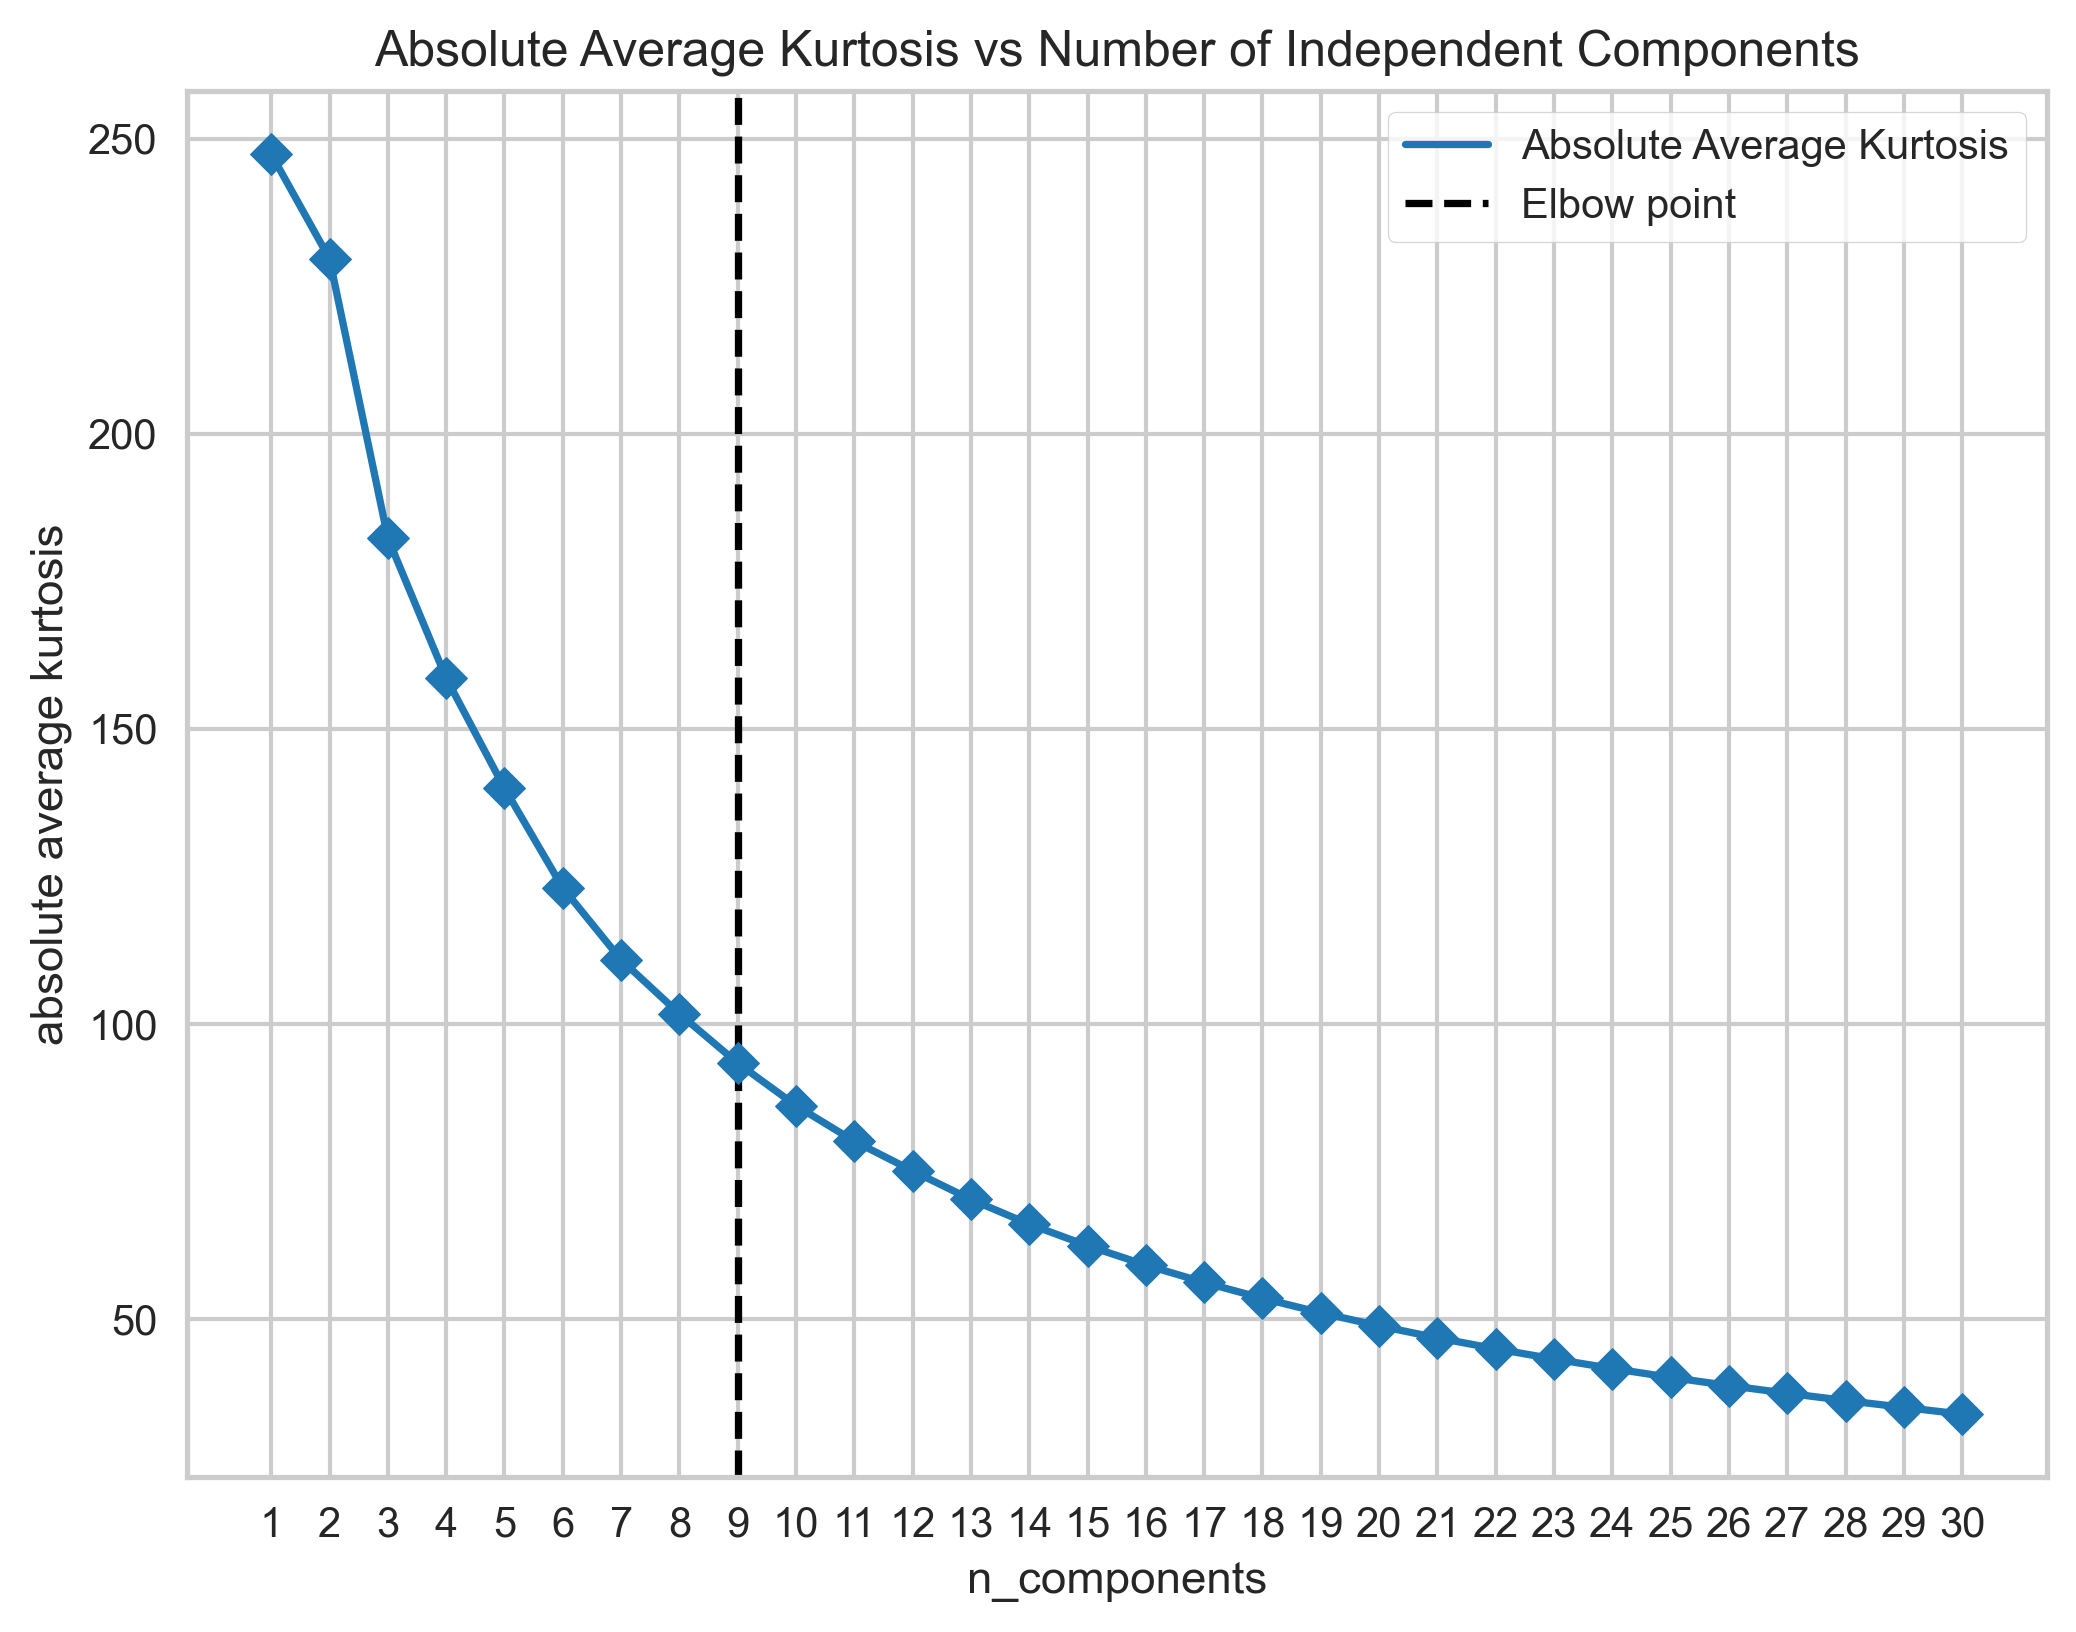

In [16]:
importlib.reload(charts)
charts.ica_visualize_absolute_mean_kurtosis(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_absolute_mean_kurtosis.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


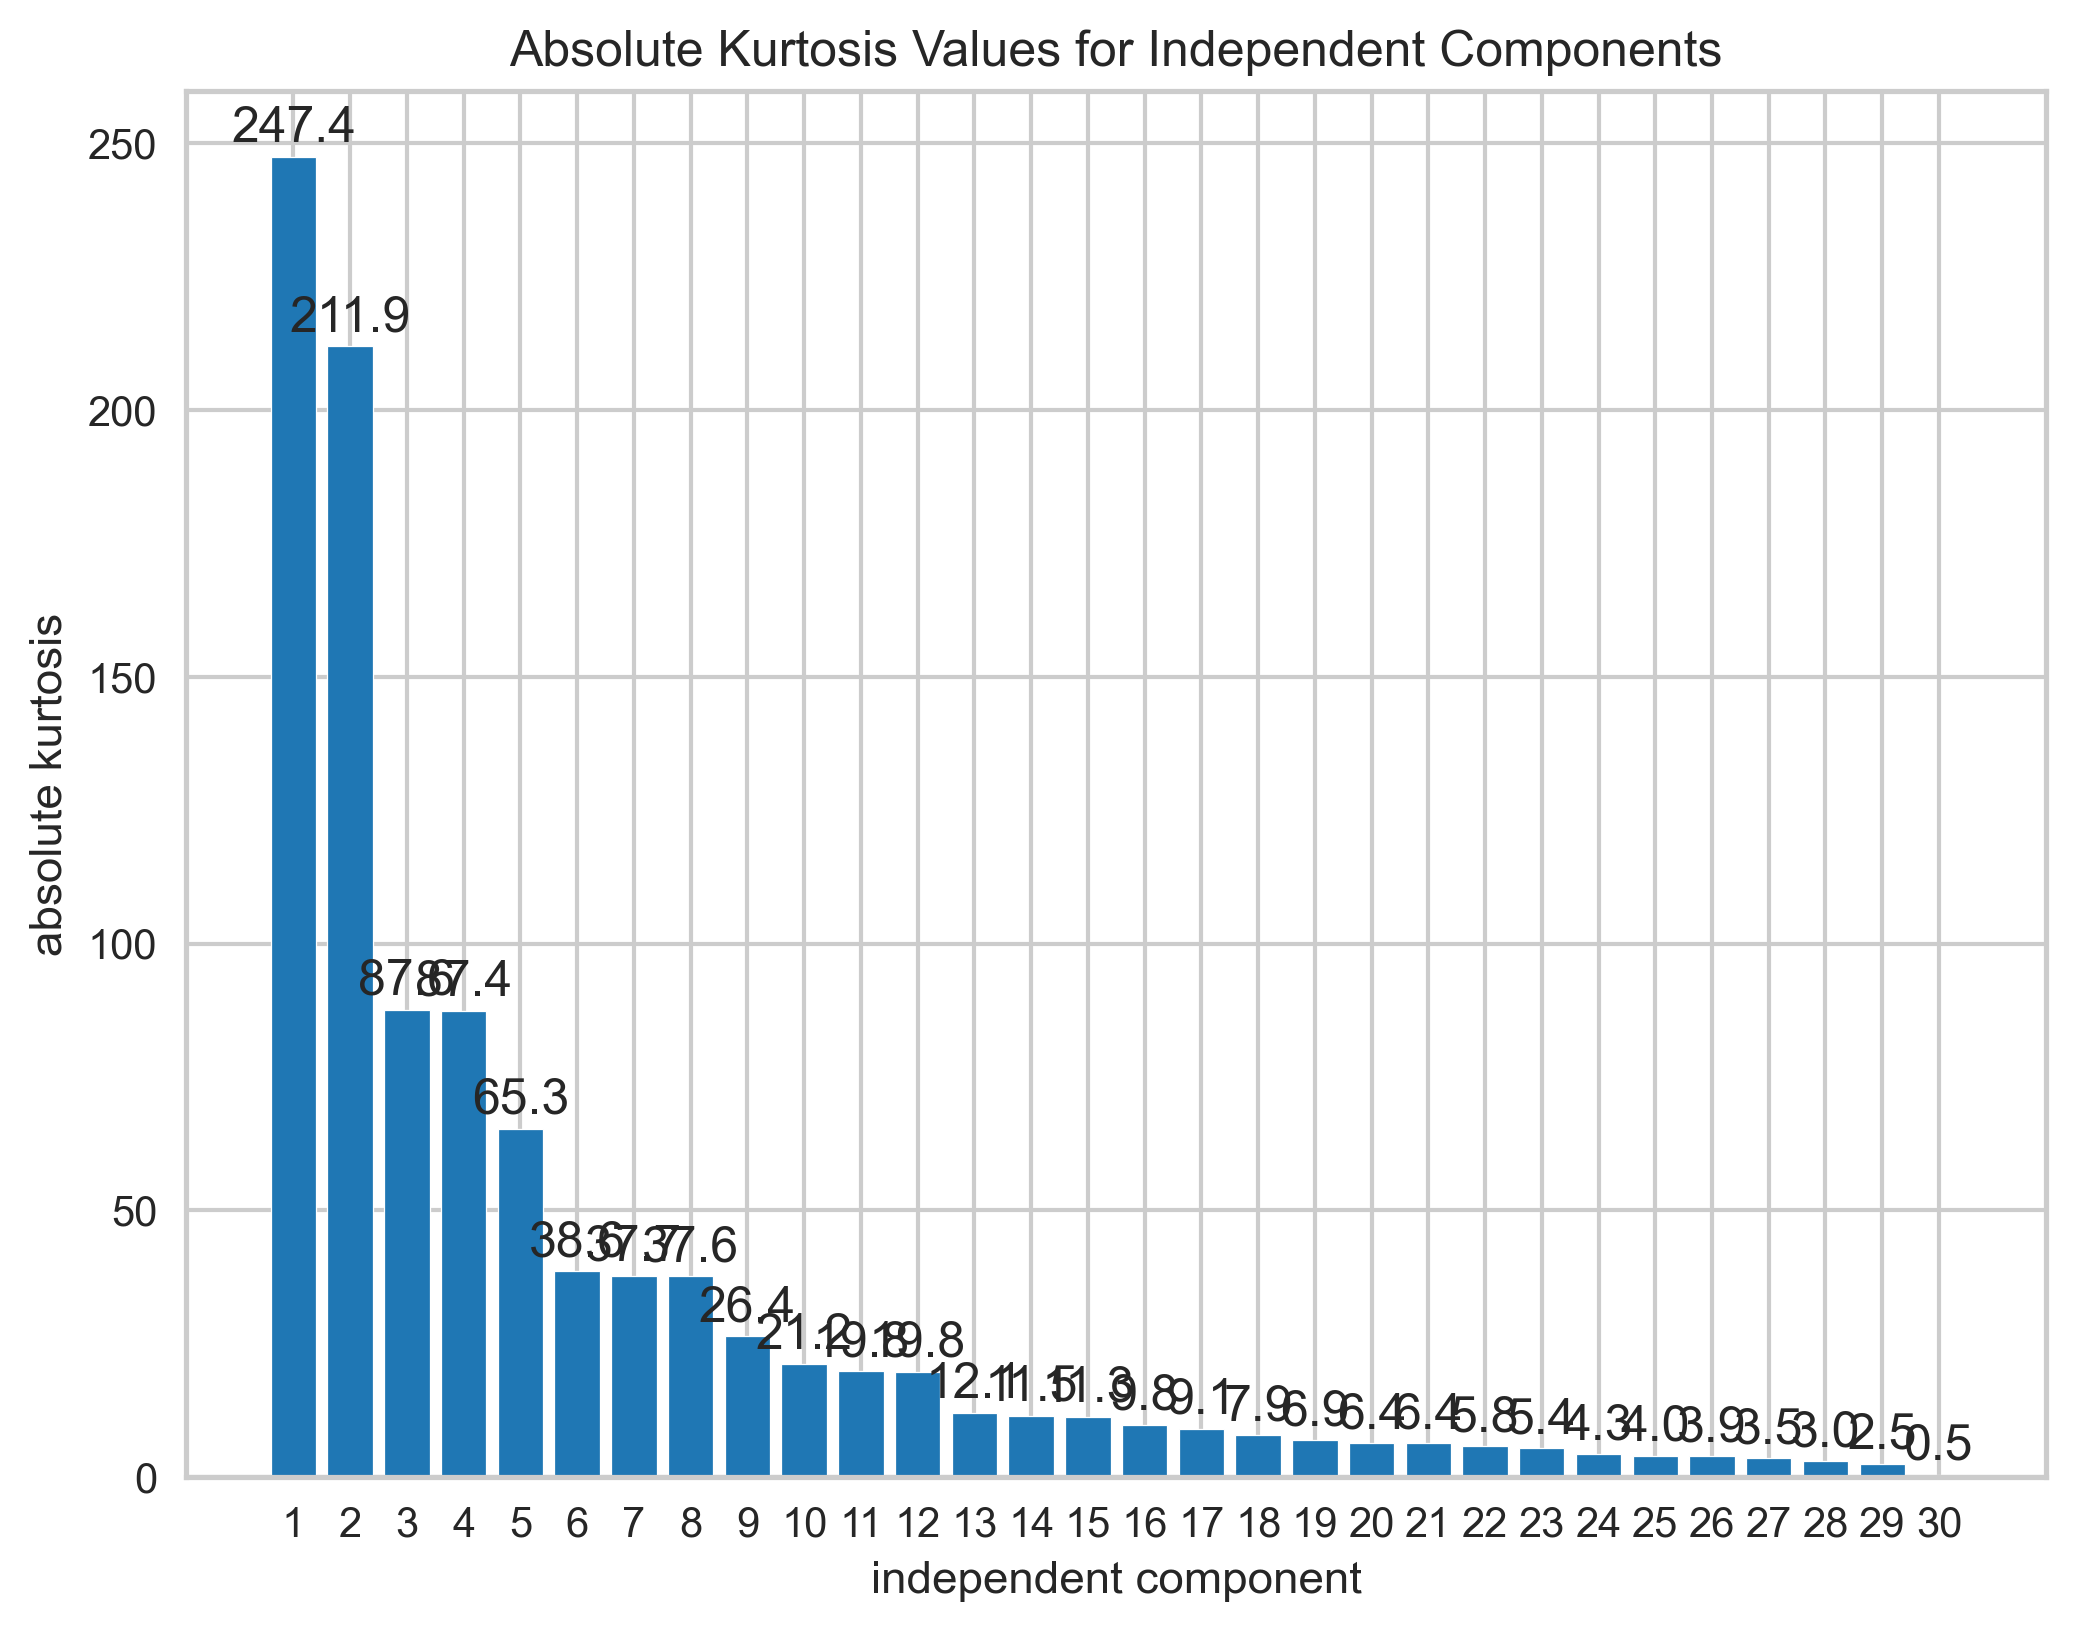

In [17]:
importlib.reload(charts)
charts.ica_visualize_absolute_kurtosis_distribution(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_kurtosis_values_components.png",
    seed=SEED,
)

## RP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


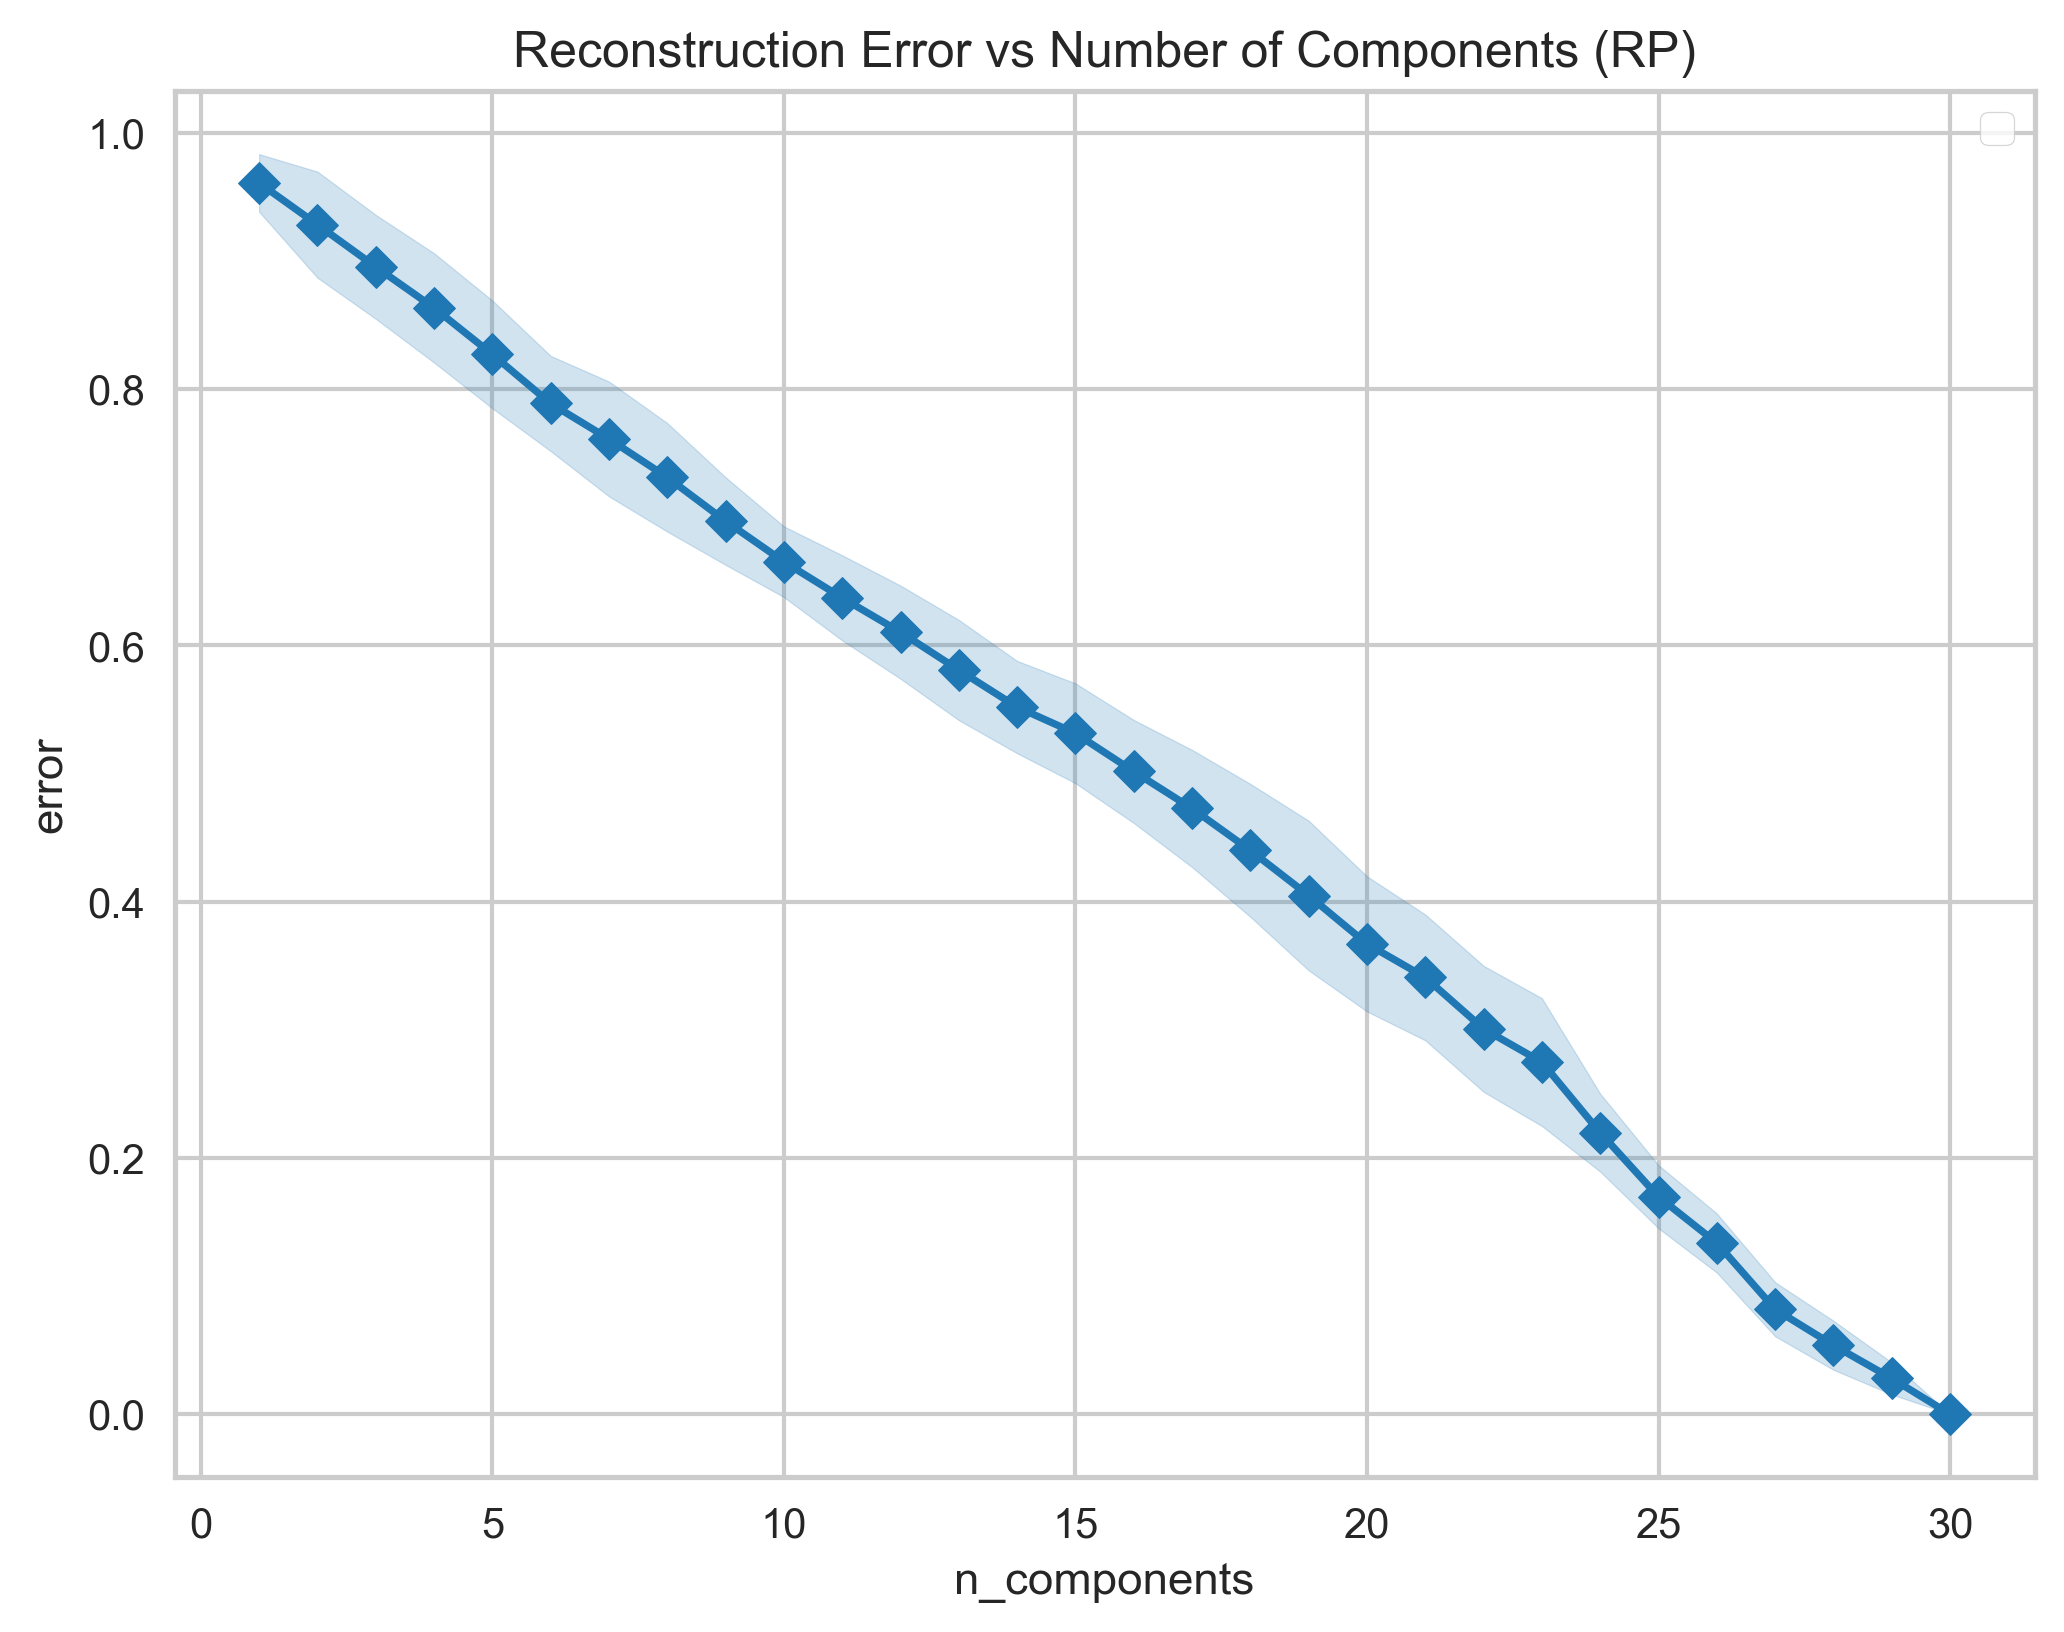

In [18]:
importlib.reload(charts)
charts.rp_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/rp_reconstruction_error.png",
)

## Isomap

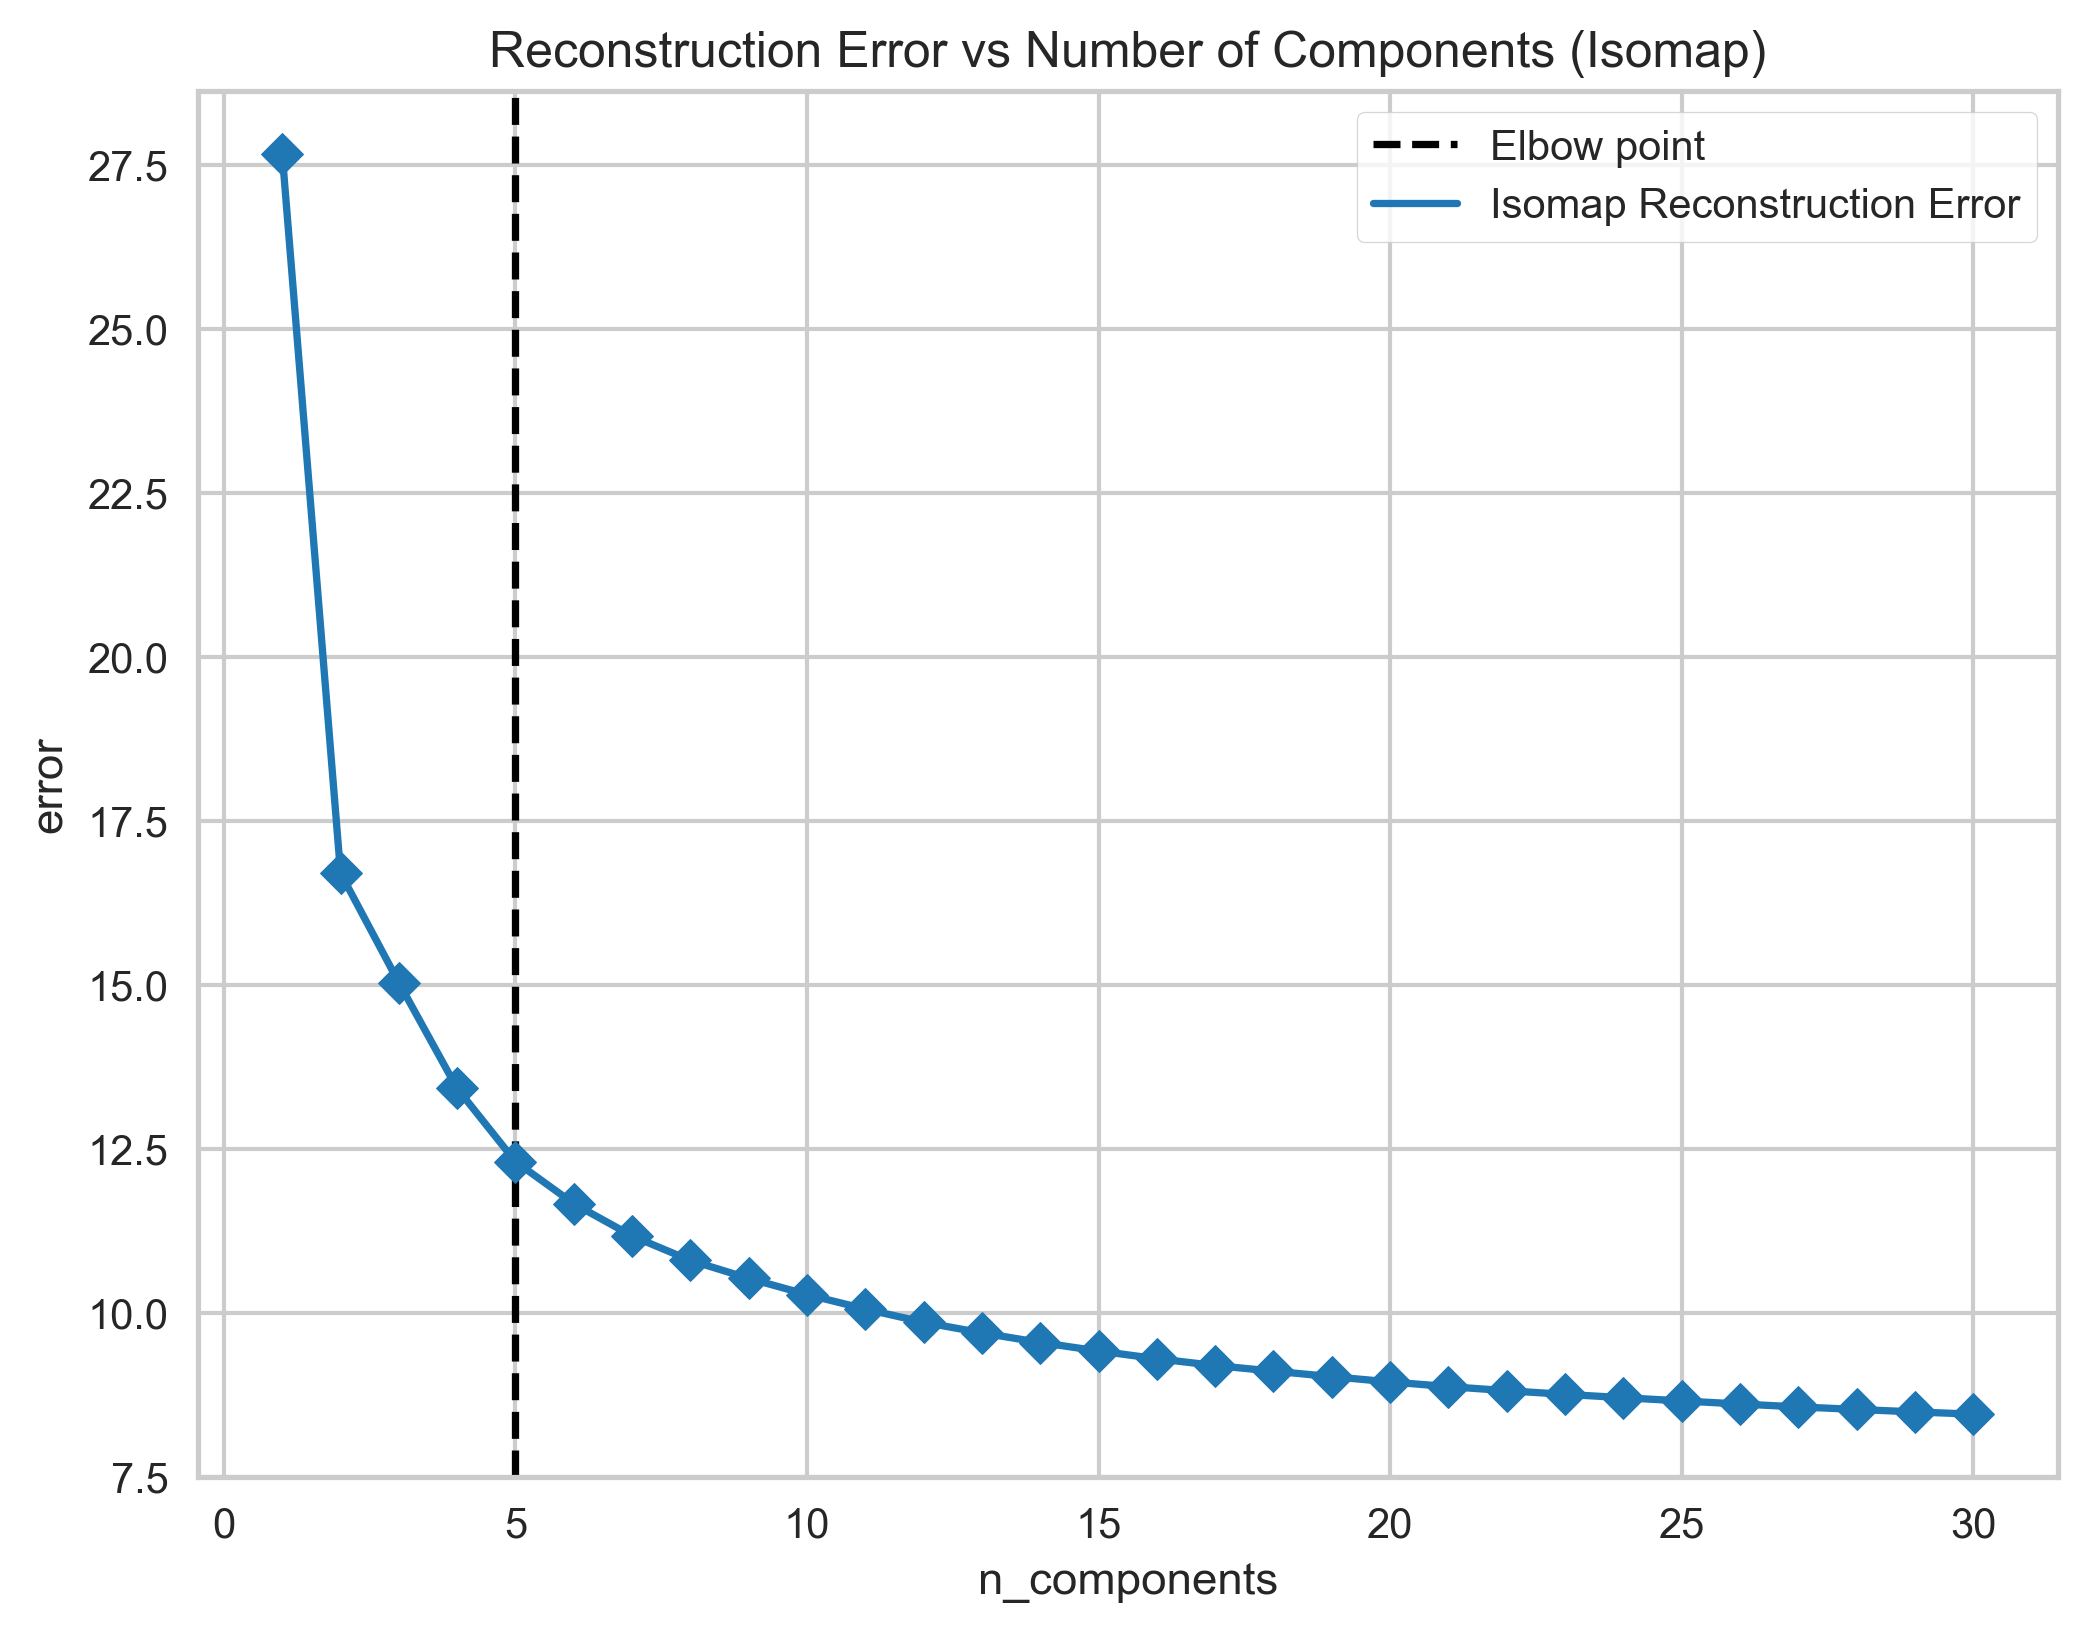

In [19]:
importlib.reload(charts)
charts.isomap_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/isomap_reconstruction_error.png",
)

## Evaluation

In [32]:
from sklearn.manifold import Isomap
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from DummyTransformer import DummyTransformer

def get_baseline():
    return "Baseline", DummyTransformer()


def get_best_pca():
    return "PCA(n=7)", PCA(n_components=7)


def get_best_ica():
    return "ICA(n=9)", FastICA(n_components=9, random_state=SEED)


def get_best_rp():
    return "RP(n=25)", GaussianRandomProjection(n_components=25, random_state=SEED)


def get_best_isomap():
    return "Isomap(n=5)", Isomap(n_components=5)



In [33]:
importlib.reload(evals)

projections = [
    get_best_pca(),
    get_best_ica(),
    get_best_rp(),
    get_best_isomap(),
]

all_projections = [get_baseline()] + projections
evals.evaluate_dim_reduction(
    transformers=all_projections,
    X_data=X_train,
    labels=y_train,
    scoring=F1_SCORE,
)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


DecisionTreeClassifier  RandomForestClassifier  \
Baseline    0                0.933043                0.967099   
PCA(n=7)    0                0.933310                0.960471   
ICA(n=9)    0                0.882742                0.946581   
RP(n=25)    0                0.938378                0.969342   
Isomap(n=5) 0                0.940206                0.972555   

               BaggingClassifier  LinearSVC  SGDClassifier  LogisticRegression  
Baseline    0           0.954067   0.977511       0.977328            0.979219  
PCA(n=7)    0           0.958488   0.970372       0.977419            0.977326  
ICA(n=9)    0           0.913746   0.945713       0.934839            0.786941  
RP(n=25)    0           0.953186   0.979309       0.963625            0.977596  
Isomap(n=5) 0           0.959843   0.975800       0.961513            0.974151

# Step 3

In [28]:
projections_with_short_names = list((a, b[0], b[1]) for a, b in zip(["pca", "ica", "rp", "isomap"], projections))

[('pca', 'PCA (n_components=7)', PCA(n_components=7)),
 ('ica', 'ICA (n_components=9)', FastICA(n_components=9, random_state=42)),
 ('rp',
  'RP (n_components=25)',
  GaussianRandomProjection(n_components=25, random_state=42)),
 ('isomap', 'Isomap (n_components=5)', Isomap(n_components=5))]

In [30]:
%%capture
for projection in projections_with_short_names:
    short_name, name, transformer = projection
    X_train_transformed = transformer.fit_transform(X_train)

    charts.gmm_visualize_aic_bic(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/em_{short_name}_aic_bic.png",
        seed=SEED,
        k_max=20,
        n_init=10,
    )
    ;
    charts.k_means_visualize(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/k_means_{short_name}_distortion.png",
        seed=SEED,
        metric='distortion',
        locate_elbow=True
    )
    ;


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [45]:
def get_best_kmeans(dim_red):
    if isinstance(dim_red, DummyTransformer):
        return "KMeans(k=8)", KMeans(random_state=SEED, n_clusters=8)
    if isinstance(dim_red, PCA):
        return "KMeans(k=8)", KMeans(random_state=SEED, n_clusters=8)
    if isinstance(dim_red, FastICA):
        return "KMeans(k=11)", KMeans(random_state=SEED, n_clusters=11)
    if isinstance(dim_red, GaussianRandomProjection):
        return "KMeans(k=9)", KMeans(random_state=SEED, n_clusters=9)
    if isinstance(dim_red, Isomap):
        return "KMeans(k=7)", KMeans(random_state=SEED, n_clusters=7)
    raise AssertionError(f'unexpected argument: {dim_red}')


def get_best_gmm(dim_red):
    if isinstance(dim_red, DummyTransformer):
        return "GMM(k=4)", GaussianMixture(random_state=SEED, n_components=4, n_init=10)
    if isinstance(dim_red, PCA):
        return "GMM(k=5)", GaussianMixture(random_state=SEED, n_components=5, n_init=10)
    if isinstance(dim_red, FastICA):
        return "GMM(k=3)", GaussianMixture(random_state=SEED, n_components=3, n_init=10)
    if isinstance(dim_red, GaussianRandomProjection):
        return "GMM(k=2)", GaussianMixture(random_state=SEED, n_components=2, n_init=10)
    if isinstance(dim_red, Isomap):
        return "GMM(k=5)", GaussianMixture(random_state=SEED, n_components=5, n_init=10)
    raise AssertionError(f'unexpected argument: {dim_red}')


def get_best_models_with_transformers():
    result = []
    for dim_red_name, dim_red in all_projections:
        k_means_name, k_means_model = get_best_kmeans(dim_red)
        k_means_element = (f"{dim_red_name}, {k_means_name}", dim_red, k_means_model)

        gmm_name, gmm_model = get_best_gmm(dim_red)
        gmm_element = (f"{dim_red_name}, {gmm_name}", dim_red, gmm_model)

        result.append(k_means_element)
        result.append(gmm_element)
    return result


models_with_transformers = get_best_models_with_transformers()

In [46]:
importlib.reload(evals)


evals.evaluate_models_with_transformers(
    models=models_with_transformers,
    X_data=X_train,
    labels=y_train
)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=8)    0    0.606061   0.369802            0.454612   
Baseline, GMM(k=4)       0    0.697255   0.390991            0.358556   
PCA(n=7), KMeans(k=8)    0    0.607281   0.366840            0.453764   
PCA(n=7), GMM(k=5)       0    0.730532   0.487692            0.465986   
ICA(n=9), KMeans(k=11)   0    0.554747   0.246943            0.343303   
ICA(n=9), GMM(k=3)       0    0.681948   0.327107            0.263362   
RP(n=25), KMeans(k=9)    0    0.593087   0.332612            0.420229   
RP(n=25), GMM(k=2)       0    0.817844   0.510207            0.337169   
Isomap(n=5), KMeans(k=7) 0    0.609779   0.392706            0.485081   
Isomap(n=5), GMM(k=5)    0    0.675355   0.421300            0.451509   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=8)    0               0.514962  
Baseline, GMM(k=4)       0               0.669846  
PCA(n=7), KMeans(k=8)    0               0.516267  
PCA(n=7), GMM(k=5)       0               0.707007  
ICA(n=9), KMeans(k=11)   0               0.413887  
ICA(n=9), GMM(k=3)       0               0.668766  
RP(n=25), KMeans(k=9)    0               0.491553  
RP(n=25), GMM(k=2)       0               0.828454  
Isomap(n=5), KMeans(k=7) 0               0.519540  
Isomap(n=5), GMM(k=5)    0               0.627365

In [47]:
kmeans_baseline_clusters = get_best_kmeans(DummyTransformer())[1].fit_predict(X_train)
gmm_baseline_clusters = get_best_gmm(DummyTransformer())[1].fit_predict(X_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [48]:
# How new clusters are similar baseline KMeans
evals.evaluate_models_with_transformers(
    models=models_with_transformers,
    X_data=X_train,
    labels=kmeans_baseline_clusters
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=8)    0    1.000000   1.000000            1.798972   
Baseline, GMM(k=4)       0    0.751784   0.540896            0.804137   
PCA(n=7), KMeans(k=8)    0    0.861819   0.692997            1.251956   
PCA(n=7), GMM(k=5)       0    0.725188   0.412329            0.628852   
ICA(n=9), KMeans(k=11)   0    0.791470   0.372562            0.730161   
ICA(n=9), GMM(k=3)       0    0.644343   0.292613            0.402270   
RP(n=25), KMeans(k=9)    0    0.857733   0.624924            1.145517   
RP(n=25), GMM(k=2)       0    0.626180   0.416494            0.512487   
Isomap(n=5), KMeans(k=7) 0    0.845863   0.591646            1.067837   
Isomap(n=5), GMM(k=5)    0    0.768766   0.475841            0.781014   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=8)    0               1.000000  
Baseline, GMM(k=4)       0               0.555491  
PCA(n=7), KMeans(k=8)    0               0.623575  
PCA(n=7), GMM(k=5)       0               0.485219  
ICA(n=9), KMeans(k=11)   0               0.353762  
ICA(n=9), GMM(k=3)       0               0.438440  
RP(n=25), KMeans(k=9)    0               0.604207  
RP(n=25), GMM(k=2)       0               0.544604  
Isomap(n=5), KMeans(k=7) 0               0.575165  
Isomap(n=5), GMM(k=5)    0               0.477350

In [49]:
evals.evaluate_models_with_transformers(
    models=models_with_transformers,
    X_data=X_train,
    labels=gmm_baseline_clusters,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=8)    0    0.751784   0.540896            0.804137   
Baseline, GMM(k=4)       0    1.000000   1.000000            1.174378   
PCA(n=7), KMeans(k=8)    0    0.726940   0.533321            0.796934   
PCA(n=7), GMM(k=5)       0    0.707867   0.392382            0.475890   
ICA(n=9), KMeans(k=11)   0    0.679402   0.295000            0.486025   
ICA(n=9), GMM(k=3)       0    0.638583   0.277094            0.294401   
RP(n=25), KMeans(k=9)    0    0.711991   0.472260            0.718192   
RP(n=25), GMM(k=2)       0    0.709629   0.436361            0.400658   
Isomap(n=5), KMeans(k=7) 0    0.710171   0.431773            0.644448   
Isomap(n=5), GMM(k=5)    0    0.723910   0.422462            0.561467   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=8)    0               0.555491  
Baseline, GMM(k=4)       0               1.000000  
PCA(n=7), KMeans(k=8)    0               0.504166  
PCA(n=7), GMM(k=5)       0               0.565594  
ICA(n=9), KMeans(k=11)   0               0.366177  
ICA(n=9), GMM(k=3)       0               0.524190  
RP(n=25), KMeans(k=9)    0               0.468735  
RP(n=25), GMM(k=2)       0               0.683152  
Isomap(n=5), KMeans(k=7) 0               0.467511  
Isomap(n=5), GMM(k=5)    0               0.542713

In [50]:
# Let's look at GMM Isomap and GMM RP!
# We could probably visualize it